<a href="https://colab.research.google.com/github/tuyen23122002/D-o-n-qu-o-m-y-bay/blob/main/Traffic_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Try authenticating again before mounting
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#HIỂN THỊ DỮ LIỆU

In [ ]:
import pandas as pd

In [ ]:
path ="/content/drive/MyDrive/data/combined_csv_data (2).csv"
data = pd.read_csv(path)
data


#LƯU TRỮ THƯ MỤC VÀO DRIVE

In [ ]:
!cp -r "/content/data_split" "/content/drive/My Drive/"


#THỐNG KÊ DỮ LIỆU

In [ ]:
data["time"] = pd.to_datetime(data['time'], unit='s')
# Đặt cột "time" làm cột chỉ mục (index)
data.set_index('time', inplace=True)

data


In [ ]:
data = data[["icao24","lat","lon","velocity","heading","geoaltitude"]]
data

In [ ]:
data.describe()

In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/data/combined_csv_data (2).csv", index_col="time")
data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

icao24 = set()
for index, row in data.iterrows():
  icao24.add(row["icao24"])


In [ ]:
print(len(list(icao24)))

3619


In [ ]:
import pandas as pd
import os

# Danh sách ICAO 24
icao24 = list(icao24)

# Tạo một thư mục để lưu các tệp con
output_dir = "output_directory"  # Thay đổi tên thư mục theo mong muốn của bạn
os.makedirs(output_dir, exist_ok=True)

# Lặp qua từng ICAO 24 trong danh sách
for icao24 in icao24:
    # Lọc dữ liệu cho từng ICAO 24
    subset_data = data[data['icao24'] == icao24]

    # Tạo tên tệp cho tệp con dựa trên giá trị của ICAO 24
    output_file_path = os.path.join(output_dir, f"{icao24}.csv")

    # Lưu dữ liệu vào tệp con
    subset_data.to_csv(output_file_path, index=True)


In [ ]:
import pandas as pd
import os

# Đường dẫn đến thư mục gốc chứa các tệp CSV
input_dir = "/content/output_directory"  # Thay đổi đường dẫn tới thư mục gốc chứa các tệp CSV
output_dir = "data_full"  # Thay đổi đường dẫn tới thư mục lưu các tệp nhỏ theo ngày
os.makedirs(output_dir, exist_ok=True)

# Lặp qua tất cả các tệp CSV trong thư mục gốc
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):  # Đảm bảo chỉ xử lý các tệp CSV
        # Đường dẫn đầy đủ đến tệp CSV
        input_file = os.path.join(input_dir, filename)

        # Đọc dữ liệu từ tệp CSV
        data = pd.read_csv(input_file)

        # Chuyển đổi cột 'timestamp' thành đối tượng datetime
        data['time'] = pd.to_datetime(data['time'])

        # Tách dữ liệu thành các nhóm theo ngày
        for date, group_data in data.groupby(data['time'].dt.date):
            # Tạo tên tệp cho tệp nhỏ dựa trên ngày và ICAO 24
            output_file_path = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}_{date}.csv")

            # Lưu dữ liệu vào tệp nhỏ
            group_data.to_csv(output_file_path, index=True)


# XÓA QUỸ ĐẠO ÍT ĐIỂM

In [ ]:
import pandas as pd
import os

# Đường dẫn đến thư mục gốc chứa các tệp CSV
input_dir = "/content/drive/MyDrive/filtered_data_0_1000"  # Thay đổi đường dẫn tới thư mục gốc chứa các tệp CSV

# Lặp qua tất cả các tệp CSV trong thư mục gốc
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):  # Đảm bảo chỉ xử lý các tệp CSV
        # Đường dẫn đầy đủ đến tệp CSV
        input_file = os.path.join(input_dir, filename)

        # Kiểm tra kích thước tệp CSV
        file_size = os.path.getsize(input_file)
        if file_size == 0:
            print(f"File {filename} is empty or does not exist.")
            os.remove(input_file)
        else:
            try:
                # Đọc dữ liệu từ tệp CSV
                data = pd.read_csv(input_file)

                # Kiểm tra số lượng điểm của dữ liệu
                num_points = len(data)

                # Nếu số lượng điểm nhỏ hơn 100, xóa tệp CSV
                if num_points < 20:
                    os.remove(input_file)
            except Exception as e:
                print(f"Error reading file {filename}: {e}")


#Tách quỹ đạo theo time

In [ ]:
import os
import shutil
import pandas as pd

# Đường dẫn đến thư mục gốc chứa các tệp CSV
input_dir = "/content/drive/MyDrive/data_full"  # Thay đổi đường dẫn tới thư mục gốc chứa các tệp CSV
output_dir = "/content/data_split"  # Thư mục để lưu các tệp CSV đã tách
non_split_dir = "/content/data_non_split"  # Thư mục để lưu các tệp không bị tách

# Tạo các thư mục đầu ra nếu chúng không tồn tại
os.makedirs(output_dir, exist_ok=True)
os.makedirs(non_split_dir, exist_ok=True)

# Ngưỡng thời gian ngắt quãng (giây)
time_gap_threshold = 3600

# Danh sách lưu trữ tên các tệp bị tách
split_files = []
non_split_files = []

# Hàm để tách dữ liệu thành các đoạn khác nhau dựa trên khoảng thời gian ngắt quãng
def split_trajectories(data, time_column, time_gap_threshold):
    # Chuyển đổi cột thời gian sang định dạng thời gian
    data[time_column] = pd.to_datetime(data[time_column])

    # Tính khoảng thời gian giữa các điểm dữ liệu liên tiếp
    data['time_diff'] = data[time_column].diff().dt.total_seconds()

    # Xác định các điểm ngắt quãng dựa trên ngưỡng thời gian
    gaps = data['time_diff'] > time_gap_threshold

    # Nếu không có khoảng ngắt quãng nào vượt ngưỡng, trả về dữ liệu gốc
    if not gaps.any():
        return [data]

    # Tạo một cột để đánh dấu các đoạn quỹ đạo khác nhau
    data['segment'] = gaps.cumsum()

    # Tách dữ liệu thành các đoạn khác nhau
    segments = [segment_data.drop(columns=['time_diff', 'segment']) for _, segment_data in data.groupby('segment')]

    return segments

# Lặp qua tất cả các tệp CSV trong thư mục gốc
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):  # Đảm bảo chỉ xử lý các tệp CSV
        # Đường dẫn đầy đủ đến tệp CSV
        input_file = os.path.join(input_dir, filename)

        # Đọc dữ liệu từ file CSV
        data = pd.read_csv(input_file)

        # Lọc các cột cần thiết
        data = data[['time', 'lat', 'lon', 'heading', 'velocity', 'geoaltitude']]

        # Tách các quỹ đạo bị ngắt quãng thời gian
        segments = split_trajectories(data, 'time', time_gap_threshold)

        # Kiểm tra xem tệp có bị ngắt quãng hay không
        if len(segments) == 1:
            # Sao chép tệp gốc vào thư mục không bị tách
            shutil.copy(input_file, non_split_dir)
            # Thêm tên tệp vào danh sách tệp không bị tách
            non_split_files.append(filename)
        else:
            # Thêm tên tệp vào danh sách tệp bị tách
            split_files.append(filename)

            # Lưu từng đoạn dữ liệu vào các file mới trong thư mục đầu ra nếu bị ngắt quãng
            for i, segment in enumerate(segments):
                output_file = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}_part_{i+1}.csv")
                segment.to_csv(output_file, index=False)

# In kết quả
print("Quá trình tách và lưu file hoàn tất.")
print("Danh sách các tệp bị tách:")
print(split_files)
print("Số lượng tệp bị tách:", len(split_files))
print("Danh sách các tệp không bị tách:")
print(non_split_files)
print("Số lượng tệp không bị tách:", len(non_split_files))


In [ ]:
import os
import shutil
import pandas as pd

# Đường dẫn đến thư mục chứa các tệp CSV không bị tách
input_dir = "/content/data_non_split"  # Thay đổi đường dẫn tới thư mục gốc chứa các tệp CSV

# Đường dẫn đến thư mục lưu các tệp CSV đã tách
output_dir = "/content/data_split"

# Tạo thư mục đầu ra nếu không tồn tại
os.makedirs(output_dir, exist_ok=True)

# Ngưỡng thời gian ngắt quãng (giây) cho việc kiểm tra lại
recheck_time_gap_threshold = 10

# Hàm để tách dữ liệu thành các đoạn khác nhau dựa trên khoảng thời gian ngắt quãng
def split_trajectories(data, time_column, time_gap_threshold):
    # Chuyển đổi cột thời gian sang định dạng thời gian
    data[time_column] = pd.to_datetime(data[time_column])

    # Tính khoảng thời gian giữa các điểm dữ liệu liên tiếp
    data['time_diff'] = data[time_column].diff().dt.total_seconds()

    # Xác định các điểm ngắt quãng dựa trên ngưỡng thời gian
    gaps = data['time_diff'] > time_gap_threshold

    # Nếu không có khoảng ngắt quãng nào vượt ngưỡng, trả về dữ liệu gốc
    if not gaps.any():
        return [data]

    # Tạo một cột để đánh dấu các đoạn quỹ đạo khác nhau
    data['segment'] = gaps.cumsum()

    # Tách dữ liệu thành các đoạn khác nhau
    segments = [segment_data.drop(columns=['time_diff', 'segment']) for _, segment_data in data.groupby('segment')]

    return segments

# Danh sách lưu trữ tên các tệp bị tách
rechecked_split_files = []

# Kiểm tra các tệp trong non_split_dir cho khoảng thời gian ngắt quãng nhỏ hơn 10 giây
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):  # Đảm bảo chỉ xử lý các tệp CSV
        # Đường dẫn đầy đủ đến tệp CSV
        input_file = os.path.join(input_dir, filename)

        # Đọc dữ liệu từ file CSV
        data = pd.read_csv(input_file)

        # Chuyển đổi cột thời gian sang định dạng thời gian
        data['time'] = pd.to_datetime(data['time'])

        # Tính khoảng thời gian giữa các điểm dữ liệu liên tiếp
        data['time_diff'] = data['time'].diff().dt.total_seconds()

        # Kiểm tra nếu có bất kỳ khoảng thời gian ngắt quãng nào lớn hơn 10 giây
        if (data['time_diff'] > recheck_time_gap_threshold).any():
            # Tách dữ liệu dựa trên khoảng thời gian ngắt quãng 10 giây
            segments = split_trajectories(data, 'time', recheck_time_gap_threshold)

            # Thêm tên tệp vào danh sách tệp bị tách
            rechecked_split_files.append(filename)

            # Lưu từng đoạn dữ liệu vào các file mới trong thư mục đầu ra
            for i, segment in enumerate(segments):
                output_file = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}_part_{i+1}.csv")
                segment.to_csv(output_file, index=False)

            # Xóa tệp gốc khỏi thư mục non_split_dir
            os.remove(input_file)

# In kết quả
print("Quá trình kiểm tra và tách file hoàn tất.")
print("Danh sách các tệp bị tách lại do có khoảng thời gian ngắt quãng > 10 giây:")
print(rechecked_split_files)
print("Số lượng tệp bị tách lại:", len(rechecked_split_files))


In [ ]:
import pandas as pd
import os

# Đường dẫn đến thư mục gốc chứa các tệp CSV
input_dir = "/content/data_non_split"  # Thay đổi đường dẫn tới thư mục gốc chứa các tệp CSV

# Hàm để kiểm tra và in ra khoảng thời gian ngắt quãng lớn hơn hoặc bằng 2 giây
def print_time_gaps(input_dir):
    for filename in os.listdir(input_dir):
        if filename.endswith(".csv"):  # Đảm bảo chỉ xử lý các tệp CSV
            # Đường dẫn đầy đủ đến tệp CSV
            input_file = os.path.join(input_dir, filename)

            # Đọc dữ liệu từ tệp CSV
            data = pd.read_csv(input_file)

            # Chuyển đổi cột 'time' sang datetime nếu cần thiết
            if 'time' in data.columns:
                data['time'] = pd.to_datetime(data['time'])

            # Tính toán khoảng thời gian ngắt quãng
            if 'time' in data.columns:
                time_diffs = data['time'].diff().dt.total_seconds().dropna()
                if (time_diffs >= 2).any():
                    print(f"File: {filename}")
                    print(f"Khoảng thời gian ngắt quãng >= 2 giây:")
                    for index, diff in time_diffs.items():  # Use .items() to iterate over (index, value) pairs
                        if diff >= 2:
                            print(f"   - Row {index + 1}: {diff} giây")
                    print()

print_time_gaps(input_dir)


#Chia dữ liệu

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Đường dẫn đến thư mục chứa các tệp CSV của bạn
input_folder = '/content/drive/MyDrive/merged_data'
# Đường dẫn đến thư mục lưu trữ các tệp đã chia
output_folder = '/content/drive/MyDrive/split_data'

# Tạo thư mục đầu ra nếu chưa tồn tại
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Tạo các thư mục con cho các tập D1 đến D5
for i in range(1, 6):
    os.makedirs(os.path.join(output_folder, f'D{i}/train'), exist_ok=True)
    os.makedirs(os.path.join(output_folder, f'D{i}/test'), exist_ok=True)

# Hàm để chia và lưu các tệp CSV
def split_csv_files(input_folder, output_folder, test_size=0.1, n_splits=5):
    files = [f for f in os.listdir(input_folder) if f.endswith('.csv')]

    for file in files:
        df = pd.read_csv(os.path.join(input_folder, file))

        for i in range(1, n_splits + 1):
            train, test = train_test_split(df, test_size=test_size, random_state=i)

            train.to_csv(os.path.join(output_folder, f'D{i}/train', file), index=False)
            test.to_csv(os.path.join(output_folder, f'D{i}/test', file), index=False)
            print(f'Processed {file} for split D{i}')

# Gọi hàm để chia và lưu các tệp CSV
split_csv_files(input_folder, output_folder)

print("Completed splitting CSV files into training and test sets.")


In [ ]:
import pandas as pd
import os

# Đường dẫn đến thư mục gốc chứa các tệp CSV
input_dir = "/content/drive/MyDrive/data_full"  # Thay đổi đường dẫn tới thư mục gốc chứa các tệp CSV
output_dir = "/content/drive/MyDrive/data_split"  # Thư mục để lưu các tệp CSV mới
os.makedirs(output_dir, exist_ok=True)

# Hàm để kiểm tra và tách các quỹ đạo
def split_trajectories(input_dir, output_dir, gap_threshold=3600):
    for filename in os.listdir(input_dir):
        if filename.endswith(".csv"):  # Đảm bảo chỉ xử lý các tệp CSV
            # Đường dẫn đầy đủ đến tệp CSV
            input_file = os.path.join(input_dir, filename)

            # Đọc dữ liệu từ tệp CSV
            data = pd.read_csv(input_file)

            # Chuyển đổi cột 'time' sang datetime nếu cần thiết
            if 'time' in data.columns:
                data['time'] = pd.to_datetime(data['time'])

                # Tính toán khoảng thời gian ngắt quãng
                data['time_diff'] = data['time'].diff().dt.total_seconds()

                # Tách dữ liệu thành các quỹ đạo mới
                trajectory_id = 0
                start_index = 0

                for index, row in data.iterrows():
                    if index > 0 and data.at[index, 'time_diff'] >= gap_threshold:
                        # Tạo một quỹ đạo mới
                        trajectory_id += 1
                        trajectory_data = data.iloc[start_index:index].drop(columns=['time_diff'])

                        # Lưu quỹ đạo mới vào tệp CSV
                        output_file = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}_trajectory_{trajectory_id}.csv")
                        trajectory_data.to_csv(output_file, index=False)

                        # Cập nhật start_index
                        start_index = index

                # Lưu quỹ đạo cuối cùng
                if start_index < len(data):
                    trajectory_id += 1
                    trajectory_data = data.iloc[start_index:].drop(columns=['time_diff'])
                    output_file = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}_trajectory_{trajectory_id}.csv")
                    trajectory_data.to_csv(output_file, index=False)

# Thực thi hàm tách quỹ đạo
split_trajectories(input_dir, output_dir)


# Vẽ quỹ đạo của các quỹ đạo bị ngắt quãng

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data_full/a4ffcb_2017-03-05.csv")
data

# Đếm số lượng chuyến bay

In [ ]:
import pandas as pd
import os

# Đường dẫn đến thư mục gốc chứa các tệp CSV
input_dir = "/content/drive/MyDrive/filtered_data_0_1000"  # Thay đổi đường dẫn tới thư mục gốc chứa các tệp CSV

dem = 0

# Lặp qua tất cả các tệp CSV trong thư mục gốc
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):  # Đảm bảo chỉ xử lý các tệp CSV
        # Đường dẫn đầy đủ đến tệp CSV
        dem = dem +1
print(dem)

243


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Đường dẫn đến thư mục gốc chứa các tệp CSV
input_dir = "/content/drive/MyDrive/data_full"  # Thay đổi đường dẫn tới thư mục gốc chứa các tệp CSV
dem = 0
# Lặp qua tất cả các tệp CSV trong thư mục gốc
for filename in os.listdir(input_dir):
   if filename == "a00439_2017-01-15.csv":
    input_file = os.path.join(input_dir,filename)
    print(input_file)


In [ ]:
import os
import shutil

# Đường dẫn đến hai thư mục chứa các file CSV
folder1 = '/content/drive/MyDrive/data_non_split'
folder2 = '/content/drive/MyDrive/data_split'

# Đường dẫn đến thư mục đầu ra để lưu trữ các file CSV đã gộp
output_folder = '/content/drive/MyDrive/merged_data'

# Tạo thư mục đầu ra nếu chưa tồn tại
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Hàm để gộp các file CSV từ mỗi thư mục vào thư mục đầu ra
def merge_csv_files(input_folder, output_folder):
    files = os.listdir(input_folder)
    for file in files:
        if file.endswith('.csv'):
            shutil.copyfile(os.path.join(input_folder, file), os.path.join(output_folder, file))

# Gọi hàm để gộp các file từ folder1 vào thư mục đầu ra
merge_csv_files(folder1, output_folder)

# Gọi hàm để gộp các file từ folder2 vào thư mục đầu ra
merge_csv_files(folder2, output_folder)

print("Đã gộp các file thành công vào thư mục", output_folder)


In [ ]:
data = pd.read_csv("/content/data_full/abf6ae_2017-03-14.csv")
data


In [ ]:

data1 = data.iloc[149:284]
data1.to_csv(os.path.join("/content/drive/MyDrive/data_full","split126.csv"))
#data2 = data.iloc[317:365]
#data2.to_csv(os.path.join("/content/drive/MyDrive/data_full","split43.csv"))


In [ ]:
import pandas as pd

search_date = '2017-03-07'
# Chuyển đổi ngày tìm kiếm sang định dạng datetime
search_date = pd.to_datetime(search_date)

# Lọc các chuyến bay trong ngày tìm kiếm và có chỉ số icao24 nhất định
flights_on_search_date = data[(data.index.date == search_date.date()) & (data['icao24'] == '2c0516')] # tb

print(flights_on_search_date)
flights_on_search_date.to_csv("ex1.csv",index = True)

In [ ]:
data = pd.read_csv("/content/data_fix_new/a4943e_2017-01-22.csv")
 # Vẽ biểu đồ đường của cột 'geoaltitude' theo 'time'
plt.figure(figsize=(8, 4))
plt.plot(data['time'], data['velocity'], marker='o', linestyle='-', color='b')
plt.xlabel('Time')
plt.ylabel('velocity')
plt.title(f'Velocity Over Time for {filename}')
plt.grid(True)
plt.show()


In [ ]:
data = pd.read_csv("/content/data_loss_new/a4943e_2017-01-22.csv")
 # Vẽ biểu đồ đường của cột 'geoaltitude' theo 'time'
plt.figure(figsize=(8, 4))
plt.plot(data['time'], data['velocity'], marker='o', linestyle='-', color='b')
plt.xlabel('Time')
plt.ylabel('velocity')
plt.title(f'Velocity Over Time for {filename}')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Đường dẫn đến thư mục gốc chứa các tệp CSV
input_dir = "/content/drive/MyDrive/data_full"  # Thay đổi đường dẫn tới thư mục gốc chứa các tệp CSV

# Lặp qua tất cả các tệp CSV trong thư mục gốc
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):  # Đảm bảo chỉ xử lý các tệp CSV
        # Đường dẫn đầy đủ đến tệp CSV
        input_file = os.path.join(input_dir, filename)

        # Đọc dữ liệu từ tệp CSV
        data = pd.read_csv(input_file)

        # Lọc ra các hàng mà có kinh độ và vĩ độ duy nhất
        unique_data = data.drop_duplicates(subset=['lon', 'lat'])

        if len(unique_data) > 30:
            # Sắp xếp dataframe theo cột 'time'
            sorted_data = data.sort_values(by='time')

            # Vẽ biểu đồ đường của cột 'velocity' theo 'time' với các điểm riêng biệt không nối với nhau
            plt.figure(figsize=(8, 4))
            plt.plot(sorted_data['time'], sorted_data['velocity'], marker='o', linestyle='', color='b')
            plt.xlabel('Time')
            plt.ylabel('Velocity')
            plt.title(f'Velocity Over Time for {filename}')
            plt.grid(True)
            plt.show()


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

input_dir = "/content/data_full"
for filename in os.listdir(input_dir):
    input_file = os.path.join(input_dir, filename)
    data = pd.read_csv(input_file)

    # Vẽ quỹ đạo của từng chuyến bay
    plt.figure(figsize=(8, 4))
    plt.plot(data['lon'], data['lat'], marker='o', linestyle='-', color='b')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Flight Trajectory of {filename}')
    plt.grid(True)
    plt.show()


In [ ]:
import pandas as pd
import os

# Đường dẫn đến thư mục gốc chứa các tệp CSV
input_dir = "/content/data_train"  # Thay đổi đường dẫn tới thư mục gốc chứa các tệp CSV
output_dir = "data_full"  # Thay đổi đường dẫn tới thư mục lưu các tệp nhỏ theo ngày
os.makedirs(output_dir, exist_ok=True)

# Lặp qua tất cả các tệp CSV trong thư mục gốc
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):  # Đảm bảo chỉ xử lý các tệp CSV
        # Đường dẫn đầy đủ đến tệp CSV
        input_file = os.path.join(input_dir, filename)

        # Đọc dữ liệu từ tệp CSV
        data = pd.read_csv(input_file)

        # Kiểm tra các cột "heading", "velocity", và "geoaltitude" không chứa giá trị null
        if data["heading"].notnull().all() and data["velocity"].notnull().all() and data["geoaltitude"].notnull().all():
            # Lưu DataFrame đã được lọc vào một tệp mới

            output_file = os.path.join(output_dir, filename)
            data.to_csv(output_file, index=False)
            os.remove( input_file)


In [ ]:
import pandas as pd
import os

# Đường dẫn đến thư mục gốc chứa các tệp CSV
input_dir = "/content/data_loss_new"  # Thay đổi đường dẫn tới thư mục gốc chứa các tệp CSV

# Lặp qua tất cả các tệp CSV trong thư mục gốc
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):  # Đảm bảo chỉ xử lý các tệp CSV
        # Đường dẫn đầy đủ đến tệp CSV
        input_file = os.path.join(input_dir, filename)

        # Đọc dữ liệu từ tệp CSV
        data = pd.read_csv(input_file)

        # Kiểm tra xem cột "heading" có giá trị null không
        if data["heading"].isnull().any():
            # Tính số dòng dữ liệu thiếu
            missing_rows = data["heading"].isnull().sum()

            # Tính tổng số dòng dữ liệu
            total_rows = len(data)

            # In ra số dòng dữ liệu thiếu và tổng số dòng dữ liệu
            print(f"File: {filename}, Missing Rows: {missing_rows}, Total Rows: {total_rows}")


In [ ]:
import os
import pandas as pd
from scipy.interpolate import interp1d

input_dir = "/content/data_full_loss"
output_dir = "data_fix_new"

# Tạo thư mục đầu ra nếu nó chưa tồn tại
os.makedirs(output_dir, exist_ok=True)

# Duyệt qua từng tệp trong thư mục đầu vào
for file_name in os.listdir(input_dir):
    input_file = os.path.join(input_dir, file_name)
    data = pd.read_csv(input_file)

    # Sắp xếp dữ liệu theo cột 'time'
    data = data.sort_values(by='time')

    # Duyệt qua từng cột
    for col in ["heading", "velocity", "geoaltitude"]:
        # Kiểm tra giá trị thiếu trong cột
        missing_values = data[col].isnull()

        # Nếu có giá trị thiếu trong cột
        if missing_values.any():
            # Đảo ngược dữ liệu
            reversed_data = data[::-1]

            # Tạo một mảng chứa chỉ số của các giá trị không thiếu
            non_missing_indices = reversed_data.index[~missing_values[::-1]]

            # Tạo một mảng chứa các giá trị không thiếu
            non_missing_values = reversed_data[col][~missing_values[::-1]]

            # Tạo một hàm spline bậc 3 dựa trên các giá trị không thiếu
            spline_func = interp1d(non_missing_indices, non_missing_values, kind="cubic", fill_value="extrapolate")

            # Dự đoán các giá trị thiếu bằng cách sử dụng hàm spline
            predicted_values = spline_func(reversed_data.index)

            # Cập nhật các giá trị thiếu trong cột bằng các giá trị được dự đoán
            data[col] = predicted_values[::-1]  # Đảo ngược lại dữ liệu

    # Lưu dataframe đã được điều chỉnh vào một tệp CSV mới trong thư mục đầu ra
    output_file = os.path.join(output_dir, file_name)
    data.to_csv(output_file, index=False)


In [ ]:
data1 = data1[["lat","lon","velocity","heading","geoaltitude"]]
data1

#Xóa Thư Mục


In [ ]:
import os

# Đường dẫn đến thư mục gốc
root_directory = "/content/drive/MyDrive/processed_data"

# Lặp qua tất cả các đối tượng trong thư mục gốc
for item in os.listdir(root_directory):
    item_path = os.path.join(root_directory, item)
    # Kiểm tra xem đối tượng là một tệp hay không
    if os.path.isfile(item_path):
        # Xóa tệp con
        os.remove(item_path)


In [ ]:
import os
import pandas as pd

input_dir = "/content/drive/MyDrive/data_full"


# Khởi tạo một DataFrame rỗng để lưu trữ dữ liệu gộp
merged_data = pd.DataFrame()

# Lặp qua từng tệp trong thư mục input_dir
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):
        input_file = os.path.join(input_dir, filename)

        # Đọc dữ liệu từ mỗi tệp CSV và gộp vào DataFrame merged_data
        data = pd.read_csv(input_file)
        merged_data = pd.concat([merged_data, data], ignore_index=True)

# Chọn các cột cần thiết từ merged_data
merged_data = merged_data[["time", "icao24", "lat", "lon", "velocity", "heading", "geoaltitude"]]

# Lưu DataFrame merged_data vào tệp CSV mới
merged_data.to_csv(output_file, index=False)

print("Merged data saved to:", output_file)


Merged data saved to: /content/data_full_fix(3).csv


In [ ]:
import os
import pandas as pd

input_dir = "/content/data_non_split"

# Lặp qua từng tệp trong thư mục input_dir
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):
        input_file = os.path.join(input_dir, filename)
        data = pd.read_csv(input_file)
        output = os.path.join("/content/data_split",filename)

        data.to_csv(output, index = False)



In [ ]:
import os
import pandas as pd

input_dir = "/content/drive/MyDrive/data_full"

dem = 0
# Lặp qua từng tệp trong thư mục input_dir
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):
        input_file = os.path.join(input_dir, filename)
        data = pd.read_csv(input_file)
        if dem <10 :
            output = os.path.join("/content/drive/MyDrive/data_test",filename)
            data.to_csv(output, index = False)
            dem = dem + 1
            os.remove(input_file)



In [ ]:
import os
import shutil
import pandas as pd

# Đường dẫn đến thư mục gốc chứa các tệp CSV
input_dir = "/content/data_full"  # Thay đổi đường dẫn tới thư mục gốc chứa các tệp CSV
output_dir = "/content/data_split"  # Thư mục để lưu các tệp CSV đã tách

# Tạo thư mục đầu ra nếu nó không tồn tại
os.makedirs(output_dir, exist_ok=True)

# Ngưỡng thời gian ngắt quãng (giây)
time_gap_threshold = 10 * 60  # 10 phút

# Hàm để tách dữ liệu thành các đoạn khác nhau dựa trên khoảng thời gian ngắt quãng
def split_trajectories(data, time_column, time_gap_threshold):
    # Chuyển đổi cột thời gian sang định dạng thời gian
    data[time_column] = pd.to_datetime(data[time_column])

    # Tính khoảng thời gian giữa các điểm dữ liệu liên tiếp
    data['time_diff'] = data[time_column].diff().dt.total_seconds()

    # Xác định các điểm ngắt quãng dựa trên ngưỡng thời gian
    gaps = data['time_diff'] > time_gap_threshold

    # Nếu không có khoảng ngắt quãng nào vượt ngưỡng, trả về dữ liệu gốc
    if not gaps.any():
        return [data]

    # Tạo một cột để đánh dấu các đoạn quỹ đạo khác nhau
    data['segment'] = gaps.cumsum()

    # Tách dữ liệu thành các đoạn khác nhau
    segments = [segment_data.drop(columns=['time_diff', 'segment']) for _, segment_data in data.groupby('segment')]

    return segments

# Lặp qua tất cả các tệp CSV trong thư mục gốc
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):  # Đảm bảo chỉ xử lý các tệp CSV
        # Đường dẫn đầy đủ đến tệp CSV
        input_file = os.path.join(input_dir, filename)

        # Sao chép tệp gốc vào thư mục đầu ra
        shutil.copy(input_file, output_dir)

        # Đọc dữ liệu từ file CSV
        data = pd.read_csv(input_file)

        # Tách các quỹ đạo bị ngắt quãng thời gian
        segments = split_trajectories(data, 'time', time_gap_threshold)

        # Lưu từng đoạn dữ liệu vào các file mới trong thư mục đầu ra
        for i, segment in enumerate(segments):
            output_file = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}_part_{i+1}.csv")
            segment.to_csv(output_file, index=False)

print("Quá trình tách và lưu file hoàn tất.")


# Biến đổi sang tọa độ trụ


In [ ]:
import os
import pandas as pd
import numpy as np
from math import radians, sin, cos, asin, sqrt, atan2

# Constants
D_max = 328084  # feet
A_max = 39370  # feet

# Coordinates of ATL airport
airport_coords = (-84.4277, 33.6407, 1026)  # (longitude, latitude, altitude) of ATL

def haversine_3d(lat1, lon1, alt1, lat2, lon2, alt2):
    R = 6371.0  # Radius of the Earth in km

    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    dalt = alt2 - alt1  # altitude difference in feet

    a = sin(dlat / 2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance_horizontal = R * c * 3280.84  # Horizontal distance in feet
    distance = sqrt(distance_horizontal**2 + dalt**2)  # Total distance

    return distance_horizontal, distance

def transform_coordinates(df, airport_coords, D_max, A_max):
    long_ap, lat_ap, alt_ap = airport_coords
    transformed_data = []

    for _, row in df.iterrows():
        long_fp, lat_fp, alt_fp = row['lon'], row['lat'], row['geoaltitude']

        # Calculate distances and angles
        distance_horizontal, distance = haversine_3d(lat_ap, long_ap, alt_ap, lat_fp, long_fp, alt_fp)
        R = distance / D_max
        theta = atan2(long_fp - long_ap, lat_fp - lat_ap)
        h = (alt_fp - alt_ap) / A_max

        transformed_data.append([R, theta, h])

    return pd.DataFrame(transformed_data, columns=['R', 'theta', 'h'])

# Directory path
input_dir = "/content/drive/MyDrive/split_data/D2/test"

# Process each file in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):
        input_file = os.path.join(input_dir, filename)

        # Read data from CSV file
        data = pd.read_csv(input_file)

        # Select the columns to transform
        coords_df = data[['lat', 'lon', 'geoaltitude']]

        # Transform coordinates to cylindrical
        transformed_coords = transform_coordinates(coords_df, airport_coords, D_max, A_max)

        # Keep other columns intact
        other_cols = data.drop(columns=['lat', 'lon', 'geoaltitude'])

        # Combine transformed coordinates with other columns
        transformed_df = pd.concat([other_cols, transformed_coords], axis=1)

        # Save the transformed data to the same CSV file
        transformed_df.to_csv(input_file, index=False)

        print(f"Transformed and saved: {input_file}")


# Chuyển từ tọa độ trụ sang tọa độ địa lý

In [ ]:
import pandas as pd
import numpy as np
from math import radians, degrees, sin, cos, asin, sqrt, atan2, acos

# Constants
D_max = 328084  # feet
A_max = 39370  # feet

# Coordinates of ATL airport
airport_coords = (-84.4277, 33.6407, 1026)  # (longitude, latitude, altitude) of ATL

def cylindrical_to_geographic(R, theta, h, airport_coords, D_max, A_max):
    long_ap, lat_ap, alt_ap = airport_coords

    # Reverse transform
    distance = R * D_max
    alt_fp = h * A_max + alt_ap

    # Calculate horizontal distance
    distance_horizontal = sqrt(distance**2 - (alt_fp - alt_ap)**2)

    # Calculate lat/lon differences
    dlon = distance_horizontal * sin(theta) / 3280.84 / 6371.0  # Convert to radians
    dlat = acos((cos(distance / 3280.84 / 6371.0) - cos(radians(lat_ap)) * cos(radians(lat_ap + dlon))) / (sin(radians(lat_ap)) * sin(radians(lat_ap + dlon))))

    # Adjust signs based on theta
    if theta < 0:
        dlon = -dlon
        dlat = -dlat

    lat_fp = degrees(dlat) + lat_ap
    long_fp = degrees(dlon) + long_ap

    return lat_fp, long_fp, alt_fp

def transform_back_coordinates(df, airport_coords, D_max, A_max):
    transformed_data = []

    for _, row in df.iterrows():
        R, theta, h = row['R'], row['theta'], row['h']

        lat_fp, long_fp, alt_fp = cylindrical_to_geographic(R, theta, h, airport_coords, D_max, A_max)
        transformed_data.append([lat_fp, long_fp, alt_fp])

    return pd.DataFrame(transformed_data, columns=['lat', 'lon', 'geoaltitude'])

# Input and output file paths
input_file = "/content/drive/MyDrive/tọa_độ_địa_lý/file_train.csv"
output_file = "/content/drive/MyDrive/tọa_độ_địa_lý/file1.csv"

# Read data from CSV file
data = pd.read_csv(input_file)

# Select the columns to transform
coords_df = data[['R', 'theta', 'h']]

# Transform coordinates back to geographic
transformed_coords = transform_back_coordinates(coords_df, airport_coords, D_max, A_max)

# Keep other columns intact
other_cols = data.drop(columns=['R', 'theta', 'h'])

# Combine transformed coordinates with other columns
transformed_df = pd.concat([other_cols, transformed_coords], axis=1)

# Save the transformed data to a new CSV file
transformed_df.to_csv(output_file, index=False)

print(f"Transformed back and saved: {output_file}")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Tạo figure và axes 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Tạo mesh trong tọa độ trụ và tính toán giá trị Z tương ứng
r = np.linspace(0, 1.25, 50)
theta = np.linspace(0, 2 * np.pi, 50)
R, Theta = np.meshgrid(r, theta)
Z = ((R**2 - 1)**2)

# Chuyển đổi sang tọa độ Đề-các để vẽ
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

# Vẽ bề mặt
ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r)

# Đặt giới hạn và nhãn
ax.set_zlim(0, 1)
ax.set_xlabel(r'$r$ (bán kính)')
ax.set_ylabel(r'$\theta$ (góc)')
ax.set_zlabel(r'$V(r, \theta)$')

plt.show()


#Train Model CNN + LSTM

In [ ]:
import numpy as np
# Khai báo hàm Windowing (dùng để tạo các cặp X, y cho time series data)
def slicing_window(df, df_start_idx, df_end_idx, input_size, label_size, offset, label_name,label_feature):
    features = [] # Khai báo list dùng để lưu trữ các X
    labels = [] # Khai báo list dùng để lưu trữ các y

    # Nếu df_end_idx = chỉ mục cuối cùng bảng dữ liệu, cần phải dời xuống 1 khoảng = window size
    if df_end_idx == None:
        df_end_idx = len(df) - label_size - offset

    df_start_idx = df_start_idx + input_size + offset

    # Duyệt qua từng mẫu dữ liệu
    for idx in range(df_start_idx, df_end_idx):
        feature_start_idx = idx - input_size - offset
        feature_end_idx = feature_start_idx + input_size

        label_start_idx = idx - 1
        label_end_idx = label_start_idx + label_size

        feature = df[label_feature][feature_start_idx:feature_end_idx] # Lấy X
        label = df[label_name][label_start_idx:label_end_idx] # Lấy y

        features.append(feature)
        labels.append(label)

    # Chuyển list thành np.ndarrray
    features = np.array(features)
    labels = np.array(labels)

    return features, labels

#MÔ Hình CNN+LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, LSTM, Dense

def build_model(input_shape, output_size):
    model = tf.keras.Sequential([

        tf.keras.Input(shape=input_shape, name='input_layer'),

        normalize_layer,

        # Convolutional Layer 1
        Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', name='conv1d_layer_1'),

        # MaxPooling Layer 1
        MaxPooling1D(pool_size=2, strides=2, name='maxpooling1d_layer_1'),


        Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', name='conv1d_layer_2'),


        MaxPooling1D(pool_size=2, strides=2, name='maxpooling1d_layer_2'),

        # LSTM Layer 1
        LSTM(64, return_sequences=True, name='lstm_layer_1'),
        Dropout(0.2, name='dropout_layer_1'),  # Dropout layer after the first LSTM layer

        # LSTM Layer 2
        LSTM(64, return_sequences=False, name='lstm_layer_2'),
        Dropout(0.2, name='dropout_layer_2'),  # Dropout layer after the second LSTM layer

        # Fully Connected Layer
        Dense(64, activation='relu', name='fc_layer_1'),

        # Dropout Layer
        Dropout(0.1, name='dropout_layer_3'),

        # Output Layer
        Dense(output_size, name='output_layer')
    ], name='lstm_model')

    return model




#Model LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout

def build_modelLSTM(input_shape, output_size):
    model = tf.keras.Sequential([

        tf.keras.Input(shape=input_shape, name='input_layer'),

        normalize_layer,

        tf.keras.layers.LSTM(132,
                             return_sequences=True,
                             name='lstm_layer_1'),
        Dropout(0.2),


        tf.keras.layers.LSTM(64,
                             return_sequences=False,
                             name='lstm_layer_2'),


        Dropout(0.2),

        tf.keras.layers.Dense(150,
                              activation='relu',
                              name='fc_layer_1'
                              ),



         Dropout(0.3),
        tf.keras.layers.Dense(output_size, name='output_layer')
    ],
    name='lstm_model')

    return model


#Train model

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model


# Đường dẫn đến thư mục chứa các file CSV
input_dir = "/content/drive/MyDrive/transformed_data"
previous_model_weights = "/content/drive/MyDrive/model/model2/model_transformed_a93337_2016-12-02.csv.h5"

# Lặp qua tất cả các file CSV trong thư mục
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):
        # Đường dẫn đầy đủ đến file CSV
        file_path = os.path.join(input_dir, filename)

        # Đọc dữ liệu từ file CSV
        data = pd.read_csv(file_path)

        # Khởi tạo dữ liệu cho tập train, val
        INPUT_SIZE = 6
        LABEL_SIZE = 1
        OFFSET = 1
        BATCH_SIZE = 64
        feature = ["R", "theta", "h", "heading", "velocity"]
        TARGET_NAME = ["R", "theta", "h"]

        dataset_length = len(data)
        TRAIN_SIZE = 1
        #VAL_SIZE = 0.2

        # Đổi tỷ lệ thành chỉ mục
        TRAIN_END_IDX = int(TRAIN_SIZE * dataset_length)
       # VAL_END_IDX = int(VAL_SIZE * dataset_length) + TRAIN_END_IDX

        # Khởi tạo X, y cho tập train
        X_train, y_train = slicing_window(data, 0, TRAIN_END_IDX, INPUT_SIZE, LABEL_SIZE, OFFSET, TARGET_NAME, feature)

        # Khởi tạo X, y cho tập val
        #X_val, y_val = slicing_window(data, TRAIN_END_IDX, VAL_END_IDX, INPUT_SIZE, LABEL_SIZE, OFFSET, TARGET_NAME, feature)

        # In hình dạng để gỡ lỗi
        print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
       # print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")


        if X_train.shape[-1] != len(feature) or y_train.shape[-1] != len(TARGET_NAME):
            raise ValueError("Feature hoặc target shape không khớp!")

        # Khởi tạo tf.data.Dataset
        train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(BATCH_SIZE)
        #val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(BATCH_SIZE)

        # Cấu hình các tham số tối ưu cho việc đọc dữ liệu
        AUTOTUNE = tf.data.AUTOTUNE
        train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
        #val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

        # Khai báo normalization layer và adapt nó
        normalize_layer = tf.keras.layers.Normalization()
        normalize_layer.adapt(np.vstack((X_train)))

        input_size = X_train.shape[1:]  # Đặt kích thước input chính xác

        model = build_model(input_size, 3)
        model.summary()

        if previous_model_weights:
            try:
                model.load_weights(previous_model_weights)
                print(f"Successfully loaded weights from {previous_model_weights}")
            except Exception as e:
                print(f"Failed to load weights from {previous_model_weights}: {e}")

        # Khai báo một số giá trị siêu tham số
        EPOCHS = 200
        LR = 1e-3

        # Cấu hình thông tin cho mô hình
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
            loss=tf.keras.losses.MeanAbsoluteError(),
        )

        # Train mô hình
        history = model.fit(train_ds, epochs=EPOCHS)


        # Lưu mô hình
        output = os.path.join("/content/drive/MyDrive/model/model2", f"model_{filename}.h5")
        model.save(output)

        previous_model_weights = output
        os.remove(file_path)



In [ ]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.7 MB/s eta 0:00:00


#Bayesian optimization

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, LSTM, Dense
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
import pickle

# Define the model building function
def build_model(input_shape, output_size, filters, kernel_size, units_LSTM1, units_LSTM2, dropout1, dropout2, units_dense):
    normalize_layer = tf.keras.layers.Normalization()
    model = tf.keras.Sequential([
        tf.keras.Input(shape=input_shape, name='input_layer'),
        normalize_layer,
        Conv1D(filters=filters, kernel_size=(kernel_size,), activation='relu', padding='same', name='conv1d_layer_1'),
        MaxPooling1D(pool_size=2, strides=2, name='maxpooling1d_layer_1'),
        Conv1D(filters=filters, kernel_size=(kernel_size,), activation='relu', padding='same', name='conv1d_layer_2'),
        MaxPooling1D(pool_size=2, strides=2, name='maxpooling1d_layer_2'),
        LSTM(units_LSTM1, return_sequences=True, name='lstm_layer_1'),
        Dropout(dropout1, name='dropout_layer_1'),
        LSTM(units_LSTM2, return_sequences=False, name='lstm_layer_2'),
        Dropout(dropout2, name='dropout_layer_2'),
        Dense(units_dense, activation='relu', name='fc_layer_1'),
        Dense(output_size, name='output_layer')
    ], name='lstm_model')
    return model

# Define the objective function
@use_named_args(dimensions=[
    Real(1e-4, 1e-2, "log-uniform", name='learning_rate'),
    Integer(32, 128, name='filters'),
    Integer(2, 5, name='kernel_size'),
    Integer(32, 128, name='units_LSTM1'),
    Integer(32, 128, name='units_LSTM2'),
    Real(0.1, 0.5, name='dropout1'),
    Real(0.1, 0.5, name='dropout2'),
    Integer(32, 128, name='units_dense'),
    Integer(50, 200, name='epochs'),
    Integer(32, 256, name='batch_size')
])
def objective(learning_rate, filters, kernel_size, units_LSTM1, units_LSTM2, dropout1, dropout2, units_dense, epochs, batch_size):
    global input_size, train_ds, AUTOTUNE, merged_data, TARGET_NAME, feature, INPUT_SIZE, LABEL_SIZE, OFFSET

    # Recalculate X_train and y_train with the new time_step
    X_train, y_train = [], []
    for flight_id in merged_data['icao24'].unique():
        flight_data = merged_data[merged_data['icao24'] == flight_id]
        X, y = slicing_window(flight_data, 0, len(flight_data), INPUT_SIZE, LABEL_SIZE, OFFSET, TARGET_NAME, feature)
        X_train.append(X)
        y_train.append(y)
    X_train = np.concatenate(X_train, axis=0)
    y_train = np.concatenate(y_train, axis=0)

    input_size = X_train.shape[1:]

    # Define model
    model = build_model(input_size, len(TARGET_NAME), filters, kernel_size, units_LSTM1, units_LSTM2, dropout1, dropout2, units_dense)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.MeanAbsoluteError(),
    )

    # Create tf.data.Dataset with batch size
    train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    train_ds_batched = train_ds.batch(batch_size).cache().prefetch(buffer_size=AUTOTUNE)

    # Train the model
    history = model.fit(train_ds_batched, epochs=epochs, verbose=0)
    train_loss = min(history.history['loss'])
    return train_loss

# Define the search space
space = [
    Real(1e-4, 1e-2, "log-uniform", name='learning_rate'),
    Integer(32, 128, name='filters'),
    Integer(2, 5, name='kernel_size'),
    Integer(32, 128, name='units_LSTM1'),
    Integer(32, 128, name='units_LSTM2'),
    Real(0.1, 0.5, name='dropout1'),
    Real(0.1, 0.5, name='dropout2'),
    Integer(32, 128, name='units_dense'),
    Integer(50, 200, name='epochs'),
    Integer(32, 256, name='batch_size')
]

# Directory path for CSV files
input_dir = "/content/drive/MyDrive/filtered_data_0_1000"
hyperparameters_file = "/content/drive/MyDrive/model/model1/best_hyperparameters.pkl"
previous_model_weights = None
previous_best_params = None

# Phân chia dữ liệu huấn luyện
def slicing_window(data, start_idx, end_idx, input_size, label_size, offset, target_name, feature):
    X = []
    y = []
    for i in range(start_idx, end_idx - input_size - label_size + 1, offset):
        X.append(data[feature].values[i:i + input_size])
        y.append(data[target_name].values[i + input_size:i + input_size + label_size])
    return np.array(X), np.array(y)

# Sát nhập các file csv
merged_data = pd.DataFrame()
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):
        file_path = os.path.join(input_dir, filename)
        df = pd.read_csv(file_path)
        merged_data = pd.concat([merged_data, df], ignore_index=True)

INPUT_SIZE = 6
LABEL_SIZE = 1
OFFSET = 1
feature = ["lat", "lon", "geoaltitude", "heading", "velocity"]
TARGET_NAME = ["lat", "lon", "geoaltitude"]

AUTOTUNE = tf.data.AUTOTUNE

# Tối ưu hóa siêu tham số
if previous_best_params is None:
    res = gp_minimize(objective, space, n_calls=20, random_state=0)
    best_params = res.x
else:
    best_params = previous_best_params

print(f"Best parameters found: {best_params}")

learning_rate, filters, kernel_size, units_LSTM1, units_LSTM2, dropout1, dropout2, units_dense, best_epochs, best_batch_size = best_params


X_train, y_train = [], []
for flight_id in merged_data['icao24'].unique():
    flight_data = merged_data[merged_data['icao24'] == flight_id]
    X, y = slicing_window(flight_data, 0, len(flight_data), INPUT_SIZE, LABEL_SIZE, OFFSET, TARGET_NAME, feature)
    X_train.append(X)
    y_train.append(y)
X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

input_size = X_train.shape[1:]

model = build_model(input_size, len(TARGET_NAME), filters, kernel_size, units_LSTM1, units_LSTM2, dropout1, dropout2, units_dense)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss=tf.keras.losses.MeanAbsoluteError(),
)

# Load previous model weights if any
if previous_model_weights:
    model.load_weights(previous_model_weights)

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_ds_batched = train_ds.batch(best_batch_size).cache().prefetch(buffer_size=AUTOTUNE)
history = model.fit(train_ds_batched, epochs=best_epochs)

output = "/content/drive/MyDrive/model/model3/final_model.h5"
model.save(output)
print(f"Saved model weights to {output}")

# Save the best hyperparameters for future use
with open(hyperparameters_file, "wb") as f:
    pickle.dump(best_params, f)

print("Training completed.")


# Đánh giá các chỉ số

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("/content/drive/MyDrive/model/model2/model_transformed_ad3529_2017-03-22.csv.h5")

# Predict on test set
y_pred = model.predict(X_test)
print(y_pred)

# Ensure y_pred is a numpy array
y_pred = np.array(y_pred)

# Check if y_pred has the correct shape (n_samples, 3)
if y_pred.shape[1] != 3:
    raise ValueError("y_pred should have 3 columns representing R, theta, h")

# Create a DataFrame with columns R, theta, h
pred_df = pd.DataFrame(y_pred, columns=['R', 'theta', 'h'])

# Specify the output file path
output_file = "/content/drive/MyDrive/tọa_độ_địa_lý/file_train.csv"

# Save the DataFrame to a CSV file
pred_df.to_csv(output_file, index=False)

print(f"Predictions saved to {output_file}")


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

# Đường dẫn tới file CSV
csv_file_path = "/content/drive/MyDrive/split_data/D2/test/2c0e29_2017-03-27.csv"

# Đọc dữ liệu từ CSV vào DataFrame
data = pd.read_csv(csv_file_path)

# Các thông số cần thiết cho mô hình
INPUT_SIZE = 6
LABEL_SIZE = 1  # Số lượng target variables: lat, lon, geoaltitude
OFFSET = 1
BATCH_SIZE = 64
FEATURES = ["R", "theta", "h", "heading", "velocity"]
TARGETS = ["R", "theta", "h"]

def slicing_window(df, input_size, label_size, offset, label_name, feature_names):
    features = []  # Khai báo list dùng để lưu trữ các X
    labels = []  # Khai báo list dùng để lưu trữ các y

    # Duyệt qua từng mẫu dữ liệu
    for idx in range(input_size + offset, len(df) - label_size):
        feature_start_idx = idx - input_size - offset
        feature_end_idx = feature_start_idx + input_size

        label_start_idx = idx - 1
        label_end_idx = label_start_idx + label_size

        feature = df[feature_names].iloc[feature_start_idx:feature_end_idx].values  # Lấy X
        label = df[label_name].iloc[label_start_idx:label_end_idx].values  # Lấy y

        features.append(feature)
        labels.append(label)

    # Chuyển list thành np.ndarray
    features = np.array(features)
    labels = np.array(labels)

    return features, labels

# Chuẩn bị toàn bộ dữ liệu cho tập kiểm tra
X_test, y_test = slicing_window(data, INPUT_SIZE, LABEL_SIZE, OFFSET, TARGETS, FEATURES)

y_test = np.squeeze(y_test, axis=1)
print(y_test)


In [ ]:
 model = load_model("/content/drive/MyDrive/model/model2/model_transformed_ad3529_2017-03-22.csv.h5")

 y_pred = model.predict(X_test)
 print(y_pred)

In [ ]:
import os
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Đường dẫn tới thư mục chứa các mô hình
model_dir = "/content/drive/MyDrive/model/model1"

# Danh sách các tệp mô hình trong thư mục
model_files = [f for f in os.listdir(model_dir) if f.endswith('.h5')]

# Kiểm tra nếu thư mục chứa các tệp mô hình
if not model_files:
    print("Không có mô hình nào trong thư mục.")
else:
    for model_file in model_files:
        model_path = os.path.join(model_dir, model_file)

        # Tải mô hình
        model = load_model(model_path)

        # Dự đoán trên tập test
        y_pred = model.predict(X_test)

        # Tính toán MAE và RMSE cho từng thành phần
        mae_lat = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
        mae_lon = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
        mae_geoaltitude = mean_absolute_error(y_test[:, 2], y_pred[:, 2])

        rmse_lat = np.sqrt(mean_squared_error(y_test[:, 0], y_pred[:, 0]))
        rmse_lon = np.sqrt(mean_squared_error(y_test[:, 1], y_pred[:, 1]))
        rmse_geoaltitude = np.sqrt(mean_squared_error(y_test[:, 2], y_pred[:, 2]))

        # Tính toán overall MSE Loss cho mô hình
        mse_loss = mean_squared_error(y_test, y_pred)

        # In kết quả cho từng mô hình
        print(f"Model: {model_file}")
        print(f"MAE Lat: {mae_lat:.4f}, RMSE Lat: {rmse_lat:.4f}")
        print(f"MAE Lon: {mae_lon:.4f}, RMSE Lon: {rmse_lon:.4f}")
        print(f"MAE Geoaltitude: {mae_geoaltitude:.4f}, RMSE Geoaltitude: {rmse_geoaltitude:.4f}")



In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

# Đường dẫn tới file CSV
csv_file_path = "/content/drive/MyDrive/filtered_data_0_1000/a1d01f_2017-01-20_1000_2000.csv"

# Đọc dữ liệu từ CSV vào DataFrame
data = pd.read_csv(csv_file_path)

# Các thông số cần thiết cho mô hình
INPUT_SIZE = 6
LABEL_SIZE = 1  # Số lượng target variables: lat, lon, geoaltitude
OFFSET = 1
BATCH_SIZE = 64
FEATURES = ["lat", "lon", "geoaltitude", "heading", "velocity"]
TARGETS = ["lat", "lon", "geoaltitude"]

def slicing_window(df, input_size, label_size, offset, label_name, feature_names):
    features = []  # Khai báo list dùng để lưu trữ các X
    labels = []  # Khai báo list dùng để lưu trữ các y

    # Duyệt qua từng mẫu dữ liệu
    for idx in range(input_size + offset, len(df) - label_size):
        feature_start_idx = idx - input_size - offset
        feature_end_idx = feature_start_idx + input_size

        label_start_idx = idx - 1
        label_end_idx = label_start_idx + label_size

        feature = df[feature_names].iloc[feature_start_idx:feature_end_idx].values  # Lấy X
        label = df[label_name].iloc[label_start_idx:label_end_idx].values  # Lấy y

        features.append(feature)
        labels.append(label)

    # Chuyển list thành np.ndarray
    features = np.array(features)
    labels = np.array(labels)

    return features, labels

# Chuẩn bị toàn bộ dữ liệu cho tập kiểm tra
X_test, y_test = slicing_window(data, INPUT_SIZE, LABEL_SIZE, OFFSET, TARGETS, FEATURES)

y_test = np.squeeze(y_test, axis=1)
print(y_test)


In [ ]:
# Load the trained model
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error

model = load_model("/content/drive/MyDrive/model/model1/model_a7b13b_2017-01-25.csv.h5")

# Predict on test set
y_pred = model.predict(X_test)

print(y_pred)

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming y_test and y_pred are numpy arrays of shape (n_samples, 3)
mae_lat = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
mae_lon = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
mae_geoaltitude = mean_absolute_error(y_test[:, 2], y_pred[:, 2])

rmse_lat = np.sqrt(mean_squared_error(y_test[:, 0], y_pred[:, 0]))
rmse_lon = np.sqrt(mean_squared_error(y_test[:, 1], y_pred[:, 1]))
rmse_geoaltitude = np.sqrt(mean_squared_error(y_test[:, 2], y_pred[:, 2]))

print(f"MAE Lat: {mae_lat:.4f}, RMSE Lat: {rmse_lat:.4f}")
print(f"MAE Lon: {mae_lon:.4f}, RMSE Lon: {rmse_lon:.4f}")
print(f"MAE Geoaltitude: {mae_geoaltitude:.4f}, RMSE Geoaltitude: {rmse_geoaltitude:.4f}")


In [ ]:
from tensorflow.keras.models import load_model

# Tải mô hình từ đường dẫn
final_model = load_model("/content/drive/MyDrive/model/model1")


# Dự đoán trên dữ liệu test đã được chuẩn hóa
predictions = final_model.predict(X_test)

# In ra dự đoán cho mẫu đầu tiên
#print(predictions[0])

# Hoặc nếu bạn muốn in ra dự đoán cho tất cả các mẫu, sử dụng:
print(predictions)
print(y_test)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_prediction2(model, X, y, start, end):
    predictions = model.predict(X)

    R = predictions[:,0]
    theta = predictions[:,1]
    h = predictions[:,2]


    df = pd.DataFrame(data={"R":R, "theta": theta,
                             "h": h})

    return df


data = plot_prediction2(final_model, X_test, y_test, start=0, end=155)
data



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Thay 'data.csv' bằng tên file hoặc đường dẫn đến file của bạn
data = plot_prediction2(final_model,X_test, y_test, start=0, end=155)

# Trích xuất dữ liệu từ cột 'longtitude_actuals' và 'latitude_actuals'
kinh_do_actuals = data['longtitude_actuals']
vi_do_actuals = data['latitude_actuals']
kinh_do_predicted = data['longtitude_prediction']  # Sử dụng cột 'longtitude_prediction' cho quỹ đạo dự đoán
vi_do_predicted = data['latitude_prediction']

# Vẽ quỹ đạo máy bay
plt.plot(kinh_do_actuals, vi_do_actuals, marker='o', linestyle='--', color='blue', label='Thực tế')
plt.plot(kinh_do_predicted, vi_do_predicted, marker='x', linestyle='--', color='red', label='Dự đoán')
plt.xlabel('Kinh độ')
plt.ylabel('Vĩ độ')
plt.title('Quỹ đạo máy bay')
plt.legend()
plt.grid(False)
plt.show()


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Đường dẫn đến file CSV cụ thể
file_path = "/content/drive/MyDrive/merged_data/a262a9_2017-02-23.csv"
output_dir = "/content/drive/MyDrive/plots"

# Đảm bảo thư mục đầu ra tồn tại
os.makedirs(output_dir, exist_ok=True)

# Hàm để vẽ quỹ đạo và lưu đồ thị
def plot_trajectory(data, output_path, flight_name):
    # Loại bỏ các điểm trùng lặp dựa trên các cột lon và lat
    data = data.drop_duplicates(subset=['lon', 'lat'])

    fig, ax = plt.subplots()

    # Chuyển đổi tọa độ từ dataframe
    lon = data['lon'].values
    lat = data['lat'].values

    # Vẽ các điểm riêng biệt không có đường nối
    ax.scatter(lon, lat, label=f'Trajectory of {flight_name}', marker='o', color='b')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.legend()

    # Lưu đồ thị
    plt.savefig(output_path)
    plt.show()

# Đọc dữ liệu từ file CSV
data = pd.read_csv(file_path)

# Kiểm tra nếu các cột 'lon' và 'lat' có tồn tại trong dữ liệu
if 'lon' in data.columns and 'lat' in data.columns:
    # Lấy tên chuyến bay từ tên file
    flight_name = os.path.basename(file_path).split('.')[0]

    # Vẽ quỹ đạo và lưu đồ thị
    output_path = os.path.join(output_dir, f'trajectory_{flight_name}.png')
    plot_trajectory(data, output_path, flight_name)

    # In tên chuyến bay sau khi vẽ
    print(f"Đã vẽ xong chuyến: {flight_name}")
else:
    print(f"File {os.path.basename(file_path)} does not contain 'lon' or 'lat' columns.")


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic

# Đường dẫn đến file CSV cụ thể
file_path = "/content/drive/MyDrive/merged_data/a262a9_2017-02-23.csv"
output_dir = "/content/drive/MyDrive/plots"

# Đảm bảo thư mục đầu ra tồn tại
os.makedirs(output_dir, exist_ok=True)

# Hàm để tính khoảng cách giữa hai tọa độ địa lý
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).meters

# Hàm để nội suy điểm mới nếu khoảng cách lớn hơn 300m
def interpolate_points(lon1, lat1, lon2, lat2):
    coords1 = (lat1, lon1)
    coords2 = (lat2, lon2)
    dist = calculate_distance(coords1, coords2)

    if dist > 300:
        num_interp_points = int(dist // 300)  # Số lượng điểm nội suy
        lons = np.linspace(lon1, lon2, num=num_interp_points + 2)[1:-1]
        lats = np.linspace(lat1, lat2, num=num_interp_points + 2)[1:-1]
        return list(zip(lons, lats))
    else:
        return []

# Hàm để vẽ quỹ đạo và lưu đồ thị
def plot_trajectory(data, output_path, flight_name):
    # Loại bỏ các điểm trùng lặp dựa trên các cột lon và lat
    data = data.drop_duplicates(subset=['lon', 'lat'])

    interp_lons = []
    interp_lats = []
    new_lons = []
    new_lats = []

    # Lặp qua các điểm để kiểm tra khoảng cách và thực hiện nội suy
    for i in range(len(data) - 1):
        lon1, lat1 = data.iloc[i][['lon', 'lat']]
        lon2, lat2 = data.iloc[i + 1][['lon', 'lat']]

        # Thêm điểm gốc vào danh sách
        interp_lons.append(lon1)
        interp_lats.append(lat1)

        # Nếu khoảng cách lớn hơn 300m, thực hiện nội suy
        new_points = interpolate_points(lon1, lat1, lon2, lat2)
        for lon, lat in new_points:
            new_lons.append(lon)
            new_lats.append(lat)

    # Thêm điểm cuối cùng
    interp_lons.append(data['lon'].iloc[-1])
    interp_lats.append(data['lat'].iloc[-1])

    # Vẽ biểu đồ geoaltitude theo thời gian
    fig, ax = plt.subplots()
    ax.scatter(interp_lons, interp_lats, marker='o', color='b', label='Original Points')
    ax.scatter(new_lons, new_lats, marker='o', color='r', edgecolors='red', linewidth=1.5, label='Interpolated Points')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.legend()
    ax.set_title(f'Flight Trajectory: {flight_name}')

    # Lưu đồ thị
    plt.savefig(output_path)
    plt.show()

# Đọc dữ liệu từ file CSV
data = pd.read_csv(file_path)

# Kiểm tra nếu các cột 'lon' và 'lat' có tồn tại trong dữ liệu
if 'lon' in data.columns and 'lat' in data.columns:
    # Lấy tên chuyến bay từ tên file
    flight_name = os.path.basename(file_path).split('.')[0]

    # Vẽ quỹ đạo và lưu đồ thị
    output_path = os.path.join(output_dir, f'trajectory_{flight_name}.png')
    plot_trajectory(data, output_path, flight_name)

    # In tên chuyến bay sau khi vẽ
    print(f"Đã vẽ xong chuyến: {flight_name}")
else:
    print(f"File {os.path.basename(file_path)} does not contain 'lon' or 'lat' columns.")


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

input_dir = "/content/drive/MyDrive/filtered_data_0_1000"
for filename in os.listdir(input_dir):
    if filename == "ab9085_2017-03-15_1000_2000.csv":
        os.remove(os.path.join(input_dir, filename))

In [ ]:
import os
import pandas as pd

# Đường dẫn đến thư mục chứa các file CSV
input_dir = "/content/drive/MyDrive/filtered_data_0_1000"

# Danh sách các cột cần lấy từ file CSV
columns_to_keep = ['time', 'lat', 'lon', 'velocity', 'heading', 'geoaltitude']

# Duyệt qua từng file trong thư mục
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):
        # Đường dẫn đầy đủ đến file CSV
        file_path = os.path.join(input_dir, filename)

        # Đọc dữ liệu từ file CSV, chỉ lấy các cột cần thiết
        data = pd.read_csv(file_path, usecols=columns_to_keep)

        # Lưu dữ liệu đã lọc vào file CSV mới (ghi đè lên file cũ)
        data.to_csv(file_path, index=False)

        # Xóa file cũ
        os.remove(file_path)

        # Đường dẫn đến file CSV mới (với cùng tên)
        new_file_path = os.path.join(input_dir, filename)

        # Lưu dữ liệu đã lọc vào file CSV mới
        data.to_csv(new_file_path, index=False)


In [ ]:
import os
import pandas as pd

# Đường dẫn đến thư mục chứa các file CSV đã lọc
filtered_data_dir = "/content/drive/MyDrive/filtered_data_0_1000"

# Đảm bảo thư mục lưu dữ liệu đã lọc tồn tại
os.makedirs(filtered_data_dir, exist_ok=True)

# Hàm để lọc và lưu các chuyến bay có độ cao từ 3000 đến 4000m
def filter_and_save(data, flight_name):
    # Lọc các điểm có độ cao từ 1000 đến 2000m
    filtered_data = data[(data['geoaltitude'] >= 0) & (data['geoaltitude'] <= 1000)]

    # Nếu không có dữ liệu sau khi lọc, bỏ qua
    if filtered_data.empty:
        print(f"Không có điểm dữ liệu nào từ 0 đến 1000m cho chuyến: {flight_name}")
    else:
        # Lưu vào file CSV mới
        filtered_file_path = os.path.join(filtered_data_dir, f'{flight_name}_1000_2000.csv')
        filtered_data.to_csv(filtered_file_path, index=False)
        print(f"Đã lưu các điểm dữ liệu từ 1000 đến 2000m cho chuyến: {flight_name}")

# Đường dẫn đến thư mục chứa các file CSV gốc
input_dir = "/content/drive/MyDrive/merged_data"

# Lặp qua tất cả các file CSV trong thư mục
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):
        # Đường dẫn đầy đủ đến file CSV
        file_path = os.path.join(input_dir, filename)

        # Đọc dữ liệu từ file CSV
        data = pd.read_csv(file_path)

        # Lấy tên chuyến bay từ tên file
        flight_name = filename.split('.')[0]

        # Lọc và lưu các chuyến bay có độ cao từ 1000 đến 2000m
        filter_and_save(data, flight_name)


# KIẾN THIẾT LẠI QUỸ ĐẠO

In [ ]:
import pandas as pd
data1 = pd.read_csv("/content/drive/MyDrive/data_non_split/aba941_2017-03-13.csv")
data1
#data = pd.read_csv("/content/drive/MyDrive/transformed_data/transformed_a0fb74_2017-02-23.csv")
#data
import numpy as np
# Khai báo hàm Windowing (dùng để tạo các cặp X, y cho time series data)
def slicing_window(df, df_start_idx, df_end_idx, input_size, label_size, offset, label_name,label_feature):
    features = [] # Khai báo list dùng để lưu trữ các X
    labels = [] # Khai báo list dùng để lưu trữ các y

    # Nếu df_end_idx = chỉ mục cuối cùng bảng dữ liệu, cần phải dời xuống 1 khoảng = window size
    if df_end_idx == None:
        df_end_idx = len(df) - label_size - offset

    df_start_idx = df_start_idx + input_size + offset

    # Duyệt qua từng mẫu dữ liệu
    for idx in range(df_start_idx, df_end_idx):
        feature_start_idx = idx - input_size - offset
        feature_end_idx = feature_start_idx + input_size

        label_start_idx = idx - 1
        label_end_idx = label_start_idx + label_size

        feature = df[label_feature][feature_start_idx:feature_end_idx] # Lấy X
        label = df[label_name][label_start_idx:label_end_idx] # Lấy y

        features.append(feature)
        labels.append(label)

    # Chuyển list thành np.ndarrray
    features = np.array(features)
    labels = np.array(labels)

    return features, labels



In [ ]:
INPUT_SIZE = 20
LABEL_SIZE = 1
OFFSET = 1
BATCH_SIZE = 64
feature = ["lat","lon","geoaltitude","heading","velocity"]
TARGET_NAME = ["lat","lon","geoaltitude"]

X_train, y_train = slicing_window(data1, 0, len(data1), INPUT_SIZE, LABEL_SIZE, OFFSET, TARGET_NAME, feature)
y_train_reshaped = y_train.reshape(-1, 3)

# Create a DataFrame from y_train_reshaped
df_y_train = pd.DataFrame(y_train_reshaped, columns=['lat', 'lon', 'geoaltitude'])

# Save DataFrame to CSV file
df_y_train.to_csv("/content/y_train.csv", index=False)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Đường dẫn đến file CSV
file_path = "/content/y_train.csv"

# Đọc dữ liệu từ file CSV vào DataFrame
df = pd.read_csv(file_path)

# Loại bỏ các hàng có cùng giá trị lat và lon
df = df.drop_duplicates(subset=['lat', 'lon'])

# Extract dữ liệu từ các cột lat, lon, geoaltitude
lat = df['lat']
lon = df['lon']
geoaltitude = df['geoaltitude']

# Tạo quỹ đạo gốc
lat_original = lat
lon_original = lon
geoaltitude_original = geoaltitude

# Tạo quỹ đạo mới với các điểm đầu gần trùng và các điểm sau lệch nhiều hơn
lat_new = lat + 0.001  # Các điểm đầu gần trùng
lon_new = lon  # Các điểm đầu gần trùng
geoaltitude_new = geoaltitude + (geoaltitude - geoaltitude.mean()) * 0.5  # Lệch nhiều hơn

# Tạo biểu đồ 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Vẽ đường thẳng nối các điểm cho quỹ đạo gốc
ax.plot(lon_original, lat_original, geoaltitude_original, color='b', alpha=0.5, label='Original Trajectory')

# Vẽ đường thẳng nối các điểm cho quỹ đạo mới
ax.plot(lon_new, lat_new, geoaltitude_new, color='r', alpha=0.5, label='New Trajectory')

# Đặt nhãn và tiêu đề
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Geoaltitude')
ax.set_title('Original and New Trajectories in 3D Space')

# Thiết lập giới hạn cho các trục để phóng to quỹ đạo
ax.set_xlim(min(min(lon_original), min(lon_new)), max(max(lon_original), max(lon_new)))
ax.set_ylim(min(min(lat_original), min(lat_new)), max(max(lat_original), max(lat_new)))
ax.set_zlim(min(min(geoaltitude_original), min(geoaltitude_new)), max(max(geoaltitude_original), max(geoaltitude_new)))

# Thêm chú giải để phân biệt hai quỹ đạo
ax.legend()

# Hiển thị biểu đồ
plt.show()


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Danh sách các đường dẫn đến các file CSV
file_paths = [
    "/content/drive/MyDrive/transformed_data/transformed_aa6dd8_2017-02-27.csv",
    "/content/drive/MyDrive/transformed_data/transformed_split32.csv",
    "/content/drive/MyDrive/transformed_data/transformed_a5c474_2017-03-28.csv",
    "/content/drive/MyDrive/transformed_data/transformed_split26.csv",
    "/content/drive/MyDrive/transformed_data/transformed_a102e2_2017-01-19.csv"
]

# Hàm để vẽ quỹ đạo trên cùng một đồ thị
def plot_trajectories(file_paths, output_path):
    fig = plt.figure(figsize=(12, 8))  # Điều chỉnh kích thước hình vẽ
    ax = fig.add_subplot(111, projection='3d')

    for file_path in file_paths:
        # Lấy tên file từ đường dẫn
        filename = os.path.basename(file_path)

        # Đọc dữ liệu từ file CSV
        data = pd.read_csv(file_path)

        # Chuyển đổi tọa độ từ dataframe
        R = data['R'].values
        theta = data['theta'].values
        h = data['h'].values

        # Vẽ quỹ đạo trong tọa độ trụ
        ax.plot(R, theta, h, label=filename, linestyle='-', linewidth=1)

    ax.set_xlabel('Bán kính (R)')
    ax.set_ylabel('Góc (θ)')
    ax.set_zlabel('Độ cao (h)')
    ax.legend()

    # Lưu đồ thị
    plt.savefig(output_path)
    plt.show()

# Đường dẫn để lưu đồ thị kết quả
output_path = "/content/drive/MyDrive/plots/combined_trajectory_plot.png"

# Vẽ tất cả quỹ đạo trên cùng một đồ thị và lưu đồ thị
plot_trajectories(file_paths, output_path)


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Danh sách các đường dẫn đến các file CSV
file_paths = [
    "/content/drive/MyDrive/data_full_new/aa6dd8_2017-02-27.csv",
    "/content/drive/MyDrive/data_full_new/split32.csv",
   "/content/drive/MyDrive/data_full_new/a5c474_2017-03-28.csv",
   "/content/drive/MyDrive/data_full_new/split26.csv",
    "/content/drive/MyDrive/data_full_new/a102e2_2017-01-19.csv"
]

# Hàm để vẽ quỹ đạo trên cùng một đồ thị
def plot_trajectories(file_paths, output_path):
    fig = plt.figure(figsize=(12, 8))  # Tạo hình vẽ với kích thước lớn hơn
    ax = fig.add_subplot(111, projection='3d')

    for file_path in file_paths:
        # Lấy tên file từ đường dẫn
        filename = os.path.basename(file_path)

        # Đọc dữ liệu từ file CSV
        data = pd.read_csv(file_path)

        # Chuyển đổi tọa độ từ dataframe
        lon = data['lon'].values
        lat = data['lat'].values
        alt = data['geoaltitude'].values

        # Vẽ quỹ đạo với đường thẳng nối qua các điểm
        ax.plot(lon, lat, alt, label=filename.split('.')[0], linestyle='-', linewidth=1)

    ax.set_xlabel('Longitude', fontsize=14)
    ax.set_ylabel('Latitude', fontsize=14)
    ax.set_zlabel('Altitude (m)', fontsize=14)
    ax.legend()

    # Lưu đồ thị
    plt.savefig(output_path, dpi=300)  # Tăng độ phân giải
    plt.show()

# Đường dẫn để lưu đồ thị kết quả
output_path = "/content/drive/MyDrive/plots/combined_trajectory_plot.png"

# Vẽ tất cả quỹ đạo trên cùng một đồ thị và lưu đồ thị
plot_trajectories(file_paths, output_path)


#Vẽ quỹ đạo 3D


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv("/content/geographic_data.csv")

# Tạo figure và axis 2D
plt.figure(figsize=(10, 6))

# Vẽ quỹ đạo trong hệ tọa độ địa lý với latitude và longitude
plt.plot(data['lon'], data['lat'], color='blue', linestyle='-')
#plt.plot(data1['lon'], data1['lat'], color='red', linestyle='-')

# Thiết lập nhãn trục
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Flight Trajectory in Geographic Coordinates')

# Hiển thị lưới
plt.grid(True)

# Hiển thị biểu đồ
plt.show()


In [ ]:
INPUT_SIZE = 6
LABEL_SIZE = 1
OFFSET = 1
BATCH_SIZE = 64
feature = ["R","theta","h","heading","velocity"]
TARGET_NAME  = ["R","theta","h"]

In [ ]:
import tensorflow as tf

# Khởi tạo tf.data.Dataset
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(BATCH_SIZE)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(BATCH_SIZE)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH_SIZE)

In [ ]:
# Cấu hình các tham số tối ưu cho việc đọc dữ liệu
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Khai báo normalization layer
import tensorflow as tf

normalize_layer = tf.keras.layers.Normalization()
normalize_layer.adapt(X_test)

In [ ]:
print(normalize_layer(X_test))


In [ ]:
pip install scikit-optimize


In [ ]:
# Khai báo một số giá trị siêu tham số
EPOCHS = 500
LR =0.001

In [ ]:
# Cấu hình một số thông tin cho mô hình
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LR), # Sử dụng optimizer Adam
    loss=tf.keras.losses.MeanAbsoluteError(), # Sử dụng hàm loss Mean Squared Error
)

In [ ]:
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=EPOCHS)

In [ ]:
print(X_train)

In [ ]:
print(normalize_layer(X_train))

In [ ]:
from tensorflow.keras.models import load_model

# Tải mô hình từ đường dẫn
final_model = load_model(previous_model_weights)

# Chuẩn hóa dữ liệu test
X_test_normalized = normalize_layer(X_train)

# Dự đoán trên dữ liệu test đã được chuẩn hóa
predictions = final_model.predict(X_test_normalized)

#print(X_test_normalized)

# In ra dự đoán cho mẫu đầu tiên
#print(predictions[0])

# Hoặc nếu bạn muốn in ra dự đoán cho tất cả các mẫu, sử dụng:
print(predictions)


In [ ]:
print(X_train.shape)

In [ ]:
print(y_train)

In [ ]:
# Lấy giá trị loss cuối cùng trên tập kiểm tra hoặc validation
loss = final_model.evaluate(X_test, y_test)
print("MAE:", loss)

import numpy as np

def RMSE (y_pred, y_test):
   squared_errors = (y_test - y_pred) ** 2
   mean_squared_error = np.mean(squared_errors)
   root_mean_squared_error = np.sqrt(mean_squared_error)
   return root_mean_squared_error

print("RMSE:",RMSE(final_model.predict(X_test),y_test))



In [ ]:
print(y_train[:,0][:,])

In [ ]:
import matplotlib.pyplot as plt


train_loss = history.history['loss']# Đọc thông tin loss trên tập train
val_loss = history.history['val_loss'] # Đọc thông tin loss trên tập val

plt.figure(figsize=(8, 4)) # Cài đặt kích thước khung ảnh

plt.subplot(1, 2, 1) # Khởi tạo khung ảnh cho training loss
plt.xlabel('Epochs') # Hiển thị tên trục hoành là 'Epochs'
plt.ylabel('Loss') # Hiển thị tên trục tung là 'Loss'
plt.title('Training loss') # Hiển thị title của khung ảnh hiện tại là 'Training Loss'
plt.plot(train_loss, color='green') # Vẽ đường giá trị loss trên tập train qua từng epoch (đường vẽ màu đỏ)

plt.subplot(1, 2, 2) # Khởi tạo khung ảnh cho val loss
plt.xlabel('Epochs') # Hiển thị tên trục hoành là 'Epochs'
plt.ylabel('Loss') # Hiển thị tên trục tung là 'Loss'
plt.title('Validation loss') # Hiển thị title của khung ảnh hiện tại là 'Validation loss'
plt.plot(val_loss, color='orange') # Vẽ đường giá trị loss trên tập val qua từng epoch (đường vẽ màu đỏ)

plt.show() # Hiển thị 2 khung ảnh nhỏ

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_prediction2(model, X, y, start, end):
    predictions = model.predict(X)
    if predictions.shape[1] == 1:  # Kiểm tra xem mô hình trả về một hoặc hai cột dự đoán
        lat, lon = predictions[:, 0], predictions[:, 0]  # Giả sử cả vĩ độ và kinh độ đều nằm trong cột đầu tiên
    else:
        lat, lon = predictions[:, 0], predictions[:, 1]  # Nếu mô hình trả về hai cột, giả sử cột thứ hai là kinh độ

    lat_actuals, lon_actuals = y[:, 0][:,0], y[:, 0][:,1]  # Trích xuất vĩ độ và kinh độ từ mảng y

    df = pd.DataFrame(data={"latitude_prediction": lat, "latitude_actuals": lat_actuals,
                            "longtitude_prediction": lon, "longtitude_actuals": lon_actuals})

    return df
data = plot_prediction2(final_model, X_test, y_test, start=0, end=155)

data_prediction = data[["latitude_prediction","longtitude_prediction"]]
data_actuals = data[["latitude_actuals","longtitude_actuals"]]
data_prediction.to_csv("data_prediction.csv")
data_actuals.to_csv("data_actuals.csv")





In [ ]:
pip install simplekml


#Mô phỏng trên bản đồ vệ tinh

In [ ]:
import pandas as pd
import simplekml

def create_kml_from_csv(csv_file, output_file):
    # Đọc file CSV
    df = pd.read_csv(csv_file)

    # Khởi tạo đối tượng KML
    kml = simplekml.Kml()

    # Lặp qua từng hàng trong DataFrame và thêm điểm vào KML
    for index, row in df.iterrows():
        kml.newpoint(coords=[(row['lon'], row['lat'])])

    # Lưu tệp KML
    kml.save(output_file)

# Đường dẫn đến file CSV
csv_file = '/content/drive/MyDrive/data_full_new/newdata.csv'

# Tên tệp KML đầu ra
output_file = 'data_prediction.kml'

# Tạo tệp KML từ file CSV
create_kml_from_csv(csv_file, output_file)


In [ ]:
import pandas as pd

search_date = '2017-03-28'

# Chuyển đổi ngày tìm kiếm sang định dạng datetime
search_date = pd.to_datetime(search_date)

# Lọc các chuyến bay trong ngày tìm kiếm và có chỉ số icao24 nhất định
flights_on_search_date1 = data[(data.index.date == search_date.date()) & (data['icao24'] == 'abe056')]

tong1 = 0
tong2 = 0
tong3 = 0

# Lọc các chuyến bay có velocity bị null và thêm icao24 vào tập hợp
for index, row in flights_on_search_date1.iterrows():
    if pd.isnull(row['velocity'] ):
      tong1 = tong1 + 1
for index, row in flights_on_search_date1.iterrows():
    if pd.isnull(row['heading']):
      tong2 = tong2 + 1
for index, row in flights_on_search_date1.iterrows():
    if pd.isnull(row['geoaltitude']):
      tong3 = tong3 + 1

print("Số giá trị null trong cột velocity :",tong1)
print("Số giá trị null trong cột heading :",tong2)
print("Số giá trị null trong cột geoaltitude :",tong3)
# Hiển thị kết quả
print("Tổng số điểm:",len(flights_on_search_date1))
print(flights_on_search_date1)

In [ ]:
data.info()

In [ ]:
data[data["icao24"]== "abd57e"]


#THÔNG KÊ DỮ LIỆU

In [ ]:
# Tạo một tập hợp để lưu các icao24 của các chuyến bay có VELOCITY bị null
flights_with_null_velocity = set()

# Lọc các chuyến bay có velocity bị null và thêm icao24 vào tập hợp
for index, row in data.iterrows():
    if pd.isnull(row['velocity']):
        flights_with_null_velocity.add(row['icao24'])

# Chuyển tập hợp thành danh sách để hiển thị
list_velocity = list(flights_with_null_velocity)

# Hiển thị danh sách các icao24 của các chuyến bay có velocity bị null
print("Số lượng chuyến bay có velocity bị NULL:", len(list_velocity))
print(list_velocity)


Số lượng chuyến bay có velocity bị NULL: 273
['a51b93', '2c0974', 'abec03', 'ad97cb', 'a4b294', '2c07f4', 'a3f253', '2c000f', '2c0567', 'a66a13', 'a98f2d', '2c0f59', 'a8c094', '2c0b3c', 'a0f815', 'a57362', 'a335f6', 'a7c878', 'a27de0', '2c0dfa', 'a5823e', 'abeb31', 'a972d3', 'a1102e', 'a1a60e', '2c0c93', 'a789bc', 'a4943e', 'a43b77', 'a39ac6', 'a32ad1', '2c048b', 'ab3c58', 'a449f1', 'a417af', '2c0b4b', 'abaa43', '2c0fa2', '2c00e2', '2c0f55', 'a1e9af', 'a4ef05', 'a506c9', '2c0036', 'a1c8eb', 'ab1d30', 'a4c9f6', 'ab4eeb', 'a18d60', 'ab62d3', '2c01b7', 'a202fd', 'ac8ed7', 'a7a25f', 'a0fb74', '2c0371', '2c03f8', 'a6006f', 'abe3e6', '2c0674', 'a90b3c', 'aafc2d', 'aaa58b', 'aa96e2', 'a7fb19', 'abd2e6', 'a6e89b', 'a7256e', '2c038d', 'a6fb2e', '2c04e0', 'abe892', 'a95340', 'aa7b54', '2c0873', 'a1dddf', '2c08ef', 'ae4ebc', '2c0d36', '0d0600', '2c0ba3', 'a5e921', 'a94b50', '2c07a4', '2c080c', 'a74224', 'aa6c0f', 'aaed5a', 'ab1c47', '2c036e', '2c0390', 'a7911f', '503da5', '0c2063', 'a7debf', 'ab0

In [ ]:
# Tạo một tập hợp để lưu các icao24 của các chuyến bay có HEADING bị null
flights_with_null_heading = set()

# Lọc các chuyến bay có heading bị null và thêm icao24 vào tập hợp
for index, row in data.iterrows():
    if pd.isnull(row['heading']):
        flights_with_null_heading.add(row['icao24'])

# Chuyển tập hợp thành danh sách để hiển thị
list_heading = list(flights_with_null_heading)

# Hiển thị danh sách các icao24 của các chuyến bay có heading bị null
print("Số lượng chuyến bay có heading bị NULL:", len(list_heading))
print(list_heading)



Số lượng chuyến bay có heading bị NULL: 273
['a51b93', '2c0974', 'abec03', 'ad97cb', 'a4b294', '2c07f4', 'a3f253', '2c000f', '2c0567', 'a66a13', 'a98f2d', '2c0f59', 'a8c094', '2c0b3c', 'a0f815', 'a57362', 'a335f6', 'a7c878', 'a27de0', '2c0dfa', 'a5823e', 'abeb31', 'a972d3', 'a1102e', 'a1a60e', '2c0c93', 'a789bc', 'a4943e', 'a43b77', 'a39ac6', 'a32ad1', '2c048b', 'ab3c58', 'a449f1', 'a417af', '2c0b4b', 'abaa43', '2c0fa2', '2c00e2', '2c0f55', 'a1e9af', 'a4ef05', 'a506c9', '2c0036', 'a1c8eb', 'ab1d30', 'a4c9f6', 'ab4eeb', 'a18d60', 'ab62d3', '2c01b7', 'a202fd', 'ac8ed7', 'a7a25f', 'a0fb74', '2c0371', '2c03f8', 'a6006f', 'abe3e6', '2c0674', 'a90b3c', 'aafc2d', 'aaa58b', 'aa96e2', 'a7fb19', 'abd2e6', 'a6e89b', 'a7256e', '2c038d', 'a6fb2e', '2c04e0', 'abe892', 'a95340', 'aa7b54', '2c0873', 'a1dddf', '2c08ef', 'ae4ebc', '2c0d36', '0d0600', '2c0ba3', 'a5e921', 'a94b50', '2c07a4', '2c080c', 'a74224', 'aa6c0f', 'aaed5a', 'ab1c47', '2c036e', '2c0390', 'a7911f', '503da5', '0c2063', 'a7debf', 'ab09

In [ ]:
# Tạo một tập hợp để lưu các icao24 của các chuyến bay có GEOALTITUDE bị null
flights_with_null_geoaltitude = set()

# Lọc các chuyến bay có velocity bị null và thêm icao24 vào tập hợp
for index, row in data.iterrows():
    if pd.isnull(row['geoaltitude']):
        flights_with_null_geoaltitude.add(row['icao24'])

# Chuyển tập hợp thành danh sách để hiển thị
flights_with_null_geoaltitude_list = list(flights_with_null_geoaltitude)

# Hiển thị danh sách các icao24 của các chuyến bay có velocity bị null
print("Số lượng chuyến bay bị có GEOALTITUDE (NULL):",len(flights_with_null_geoaltitude_list))

print(flights_with_null_geoaltitude_list)


Số lượng chuyến bay bị có GEOALTITUDE (NULL): 713
['a54274', 'a32890', 'a51b93', 'a13408', 'abec03', '2c0d6b', 'a19db5', 'a1e241', '2c000f', 'a66a13', 'a34e40', 'a98f2d', '2c0876', 'a57362', 'a335f6', 'a6844d', 'a7c878', '2c04d2', 'abe448', 'a789bc', 'adde49', '2c048b', 'acf5be', '2c09e9', 'a2cc46', '2c04dd', 'aa16d5', 'a1c8eb', 'a82298', 'a4c9f6', 'a77111', 'a18d60', 'a5ca58', 'ac8ed7', 'aa6dd8', '2c0371', '2c03f8', 'a1fc3b', 'abe3e6', 'ab9de9', 'aaa58b', 'aa96e2', 'adddd5', '2c09be', 'a6e89b', 'a7256e', 'a1d059', 'a963f7', 'a722db', 'abe892', 'aa7b54', 'a95c89', 'ae4ebc', '2c0d36', 'ab975c', 'ab43c6', 'a7911f', '503da5', 'a41e29', 'a0bcb2', 'a1ed66', 'a445f0', 'ab5c69', '2c00d0', 'a78605', '2c068b', '2c05dd', 'aaad8f', 'a7db08', '2c0946', 'abf4b0', 'a98408', 'abe1b6', 'a737c7', '0d02f1', 'ac77d0', '2c0fb9', 'a6e131', 'a16162', 'abdce1', 'a87918', 'ab14d9', 'aaa1de', 'ab2855', 'a6a77c', 'ab04f3', '2c0f2f', 'c06c58', 'a7a60e', 'a4e181', 'aaf111', 'a968bf', 'ab6c08', 'a385da', 'a16de1',

In [ ]:
tong_chuyen_bay = set()
for index, row in data.iterrows(): # duyet datafame
  tong_chuyen_bay.add(row["icao24"])
print(tong_chuyen_bay)
print("Tổng số chuyến bay:",len(tong_chuyen_bay))

{'a8b22f', '2c08f6', 'acd4f5', 'a78e09', 'a79ea8', 'a3d150', 'a4b971', 'a91535', 'a9d605', 'a34fae', 'a417af', 'a65b76', 'aaa1de', '0c208c', 'ac72af', 'a972d3', 'a45072', 'a4f7cb', 'abe892', 'a963bf', '2c0c2a', 'a09322', '34230a', 'a77442', 'a46d4f', 'a57d52', 'abaadd', 'acab11', 'aa6c0f', 'a923a9', 'ab1c40', 'c05856', 'a8bcf1', 'a5c1ad', 'aa7030', 'a12121', 'ad9003', 'abe056', 'a7c322', 'a114b1', 'aa6489', '2c09a7', 'aba6e6', '2c080c', 'ac058a', 'a00538', '424338', '4006b1', '4d0101', 'a9238a', 'c0669e', 'a389c0', 'adba21', 'c080a3', 'a757ae', 'a6189c', '2c031d', 'aacfbe', 'ad20f4', 'a0a7d6', 'aaf007', 'a37a0c', 'a7debf', 'ab5bb1', 'ac3625', 'abb2d5', 'a94b50', 'ab6800', '7c2e20', 'a6b168', '06a1e7', 'a92c6d', 'a8264f', 'a691cb', '2c0e79', '2c021c', 'aa700f', 'a0c955', 'aa099e', 'a18d60', '2c00ca', 'a688f4', 'a0f634', '0c2052', 'abdc78', 'aae24d', 'ab8fee', 'ad3654', 'a7706b', 'ab5ade', 'c03291', 'a46d70', 'a5745b', 'a3a873', 'a02159', 'a098f6', 'a0cf8d', 'aa95ac', 'a43ea6', 'a88dfd',

In [ ]:
# Tính số quỹ đạo của mỗi máy bay
trajectory_count_per_aircraft = data.groupby('icao24').size()

# Lọc các chuyến bay có quỹ đạo nhỏ hơn 10
x = 1
y = 100
flights_with_trajectory_between_10_and_20 = trajectory_count_per_aircraft[trajectory_count_per_aircraft.between(x, y)]

print(flights_with_trajectory_between_10_and_20.index.tolist())

# Hiển thị số chuyến bay có quỹ đạo nhỏ hơn 10
print("Số chuyến bay có điểm dữ liệu từ {0} đến {1} : {2}".format(x,y,len(flights_with_trajectory_between_10_and_20)))


['06a07d', '06a0df', '06a141', '06a1e6', '0c2046', '0c2047', '0c204c', '0c204f', '0c2051', '0c2059', '0c205b', '0c205c', '0c205d', '0c205e', '0c205f', '0c2061', '0c2063', '0c2064', '0c2081', '0c208c', '0c20ac', '0c20ba', '0c20ce', '0d002f', '0d0030', '0d0058', '0d0081', '0d02f1', '0d042b', '0d0516', '0d059d', '0d05ce', '0d05d5', '0d05e1', '0d0641', '0d06e3', '0d06f4', '0d0710', '0d072f', '0d0760', '0d0776', '0d07a8', '0d07d5', '0d07f0', '0d0804', '0d0805', '0d0806', '0d081c', '0d085c', '0d08a5', '0d08b3', '0d08fd', '0d0984', '0d0986', '0d0993', '0d099d', '0d09a4', '0d09b8', '0d09bf', '0d09d0', '0d09de', '0d09df', '0d09e5', '0d09eb', '0d09ec', '0d09f8', '15407a', '2c003b', '2c003c', '2c00d0', '2c00e0', '2c011d', '2c0144', '2c018c', '2c01ba', '2c01c2', '2c01f5', '2c01fe', '2c0208', '2c021c', '2c0240', '2c0249', '2c02a2', '2c02c8', '2c02e8', '2c0323', '2c0326', '2c032d', '2c036e', '2c03c4', '2c03d2', '2c03dc', '2c03ee', '2c03ff', '2c0409', '2c0503', '2c050c', '2c0551', '2c0558', '2c0575',

In [ ]:
# Đếm số lượng chuyến bay có tất cả giá trị heading bị thiếu
total_flights_with_all_missing_heading = 0
list_heading_null_all =[]
for icao24 in list_heading:
    if (data[data['icao24'] == icao24]['heading'].isnull().all()):
        total_flights_with_all_missing_heading += 1
        list_heading_null_all.append(icao24)

print("Số lượng chuyến bay có tất cả giá trị heading bị thiếu:", total_flights_with_all_missing_heading)
print(list_heading_null_all)

total_flights_with_all_missing_velocity = 0
list_velocity_null_all =[]
for icao24 in list_velocity:
    if data[data['icao24'] == icao24]['velocity'].isnull().all():
        total_flights_with_all_missing_velocity += 1
        list_velocity_null_all.append(icao24)


print("Số lượng chuyến bay có tất cả giá trị velocity bị thiếu:", total_flights_with_all_missing_velocity)
print(list_velocity_null_all)

total_flights_with_all_missing_geoaltitude = 0
list_geoaltitude_null_all =[]
for icao24 in flights_with_null_geoaltitude_list:
    if data[data['icao24'] == icao24]['geoaltitude'].isnull().all():
        total_flights_with_all_missing_geoaltitude += 1
        list_geoaltitude_null_all.append(icao24)


print("Số lượng chuyến bay có tất cả giá trị geoaltitude bị thiếu:", total_flights_with_all_missing_geoaltitude)
print(list_geoaltitude_null_all)

total_flights_with_all_missing_full_3_cot = 0
list_null_all =[]
for icao24 in list_heading:
    if (data[data['icao24'] == icao24]['heading'].isnull().all()) and (data[data['icao24'] == icao24]['velocity'].isnull().all()) and (data[data['icao24'] == icao24]['geoaltitude'].isnull().all()):
        total_flights_with_all_missing_full_3_cot += 1
        list_null_all.append(icao24)


print("Số lượng chuyến bay có tất cả giá trị geoaltitude, velocity, heading bị thiếu:", total_flights_with_all_missing_full_3_cot)
print(list_null_all)


Số lượng chuyến bay có tất cả giá trị heading bị thiếu: 20
['a1a60e', 'a4c9f6', '2c01b7', 'aafc2d', '2c0873', '2c0d36', 'a5e921', '2c036e', '2c0390', 'a7cb52', 'a16394', 'ab8ba5', 'aac366', 'a19d27', '2c0b5e', 'a8e47c', '2c00f2', 'a36d13', 'a62f85', 'a40c4b']
Số lượng chuyến bay có tất cả giá trị velocity bị thiếu: 20
['a1a60e', 'a4c9f6', '2c01b7', 'aafc2d', '2c0873', '2c0d36', 'a5e921', '2c036e', '2c0390', 'a7cb52', 'a16394', 'ab8ba5', 'aac366', 'a19d27', '2c0b5e', 'a8e47c', '2c00f2', 'a36d13', 'a62f85', 'a40c4b']
Số lượng chuyến bay có tất cả giá trị geoaltitude bị thiếu: 29
['a4c9f6', 'a5ca58', '2c0d36', '2c00f2', '2c0c2a', 'a1a60e', '2c01b7', 'aafc2d', '2c0873', '2c0b2a', '2c036e', '2c032d', 'a7cb52', '2c0240', 'a62f85', '2c01d9', 'a40c4b', '2c0b0b', 'a5e921', '2c0390', 'a16394', 'ab8ba5', 'a19d27', 'a8e47c', 'a36d13', '2c08af', 'aac366', '2c0b5e', '2c03ee']
Số lượng chuyến bay có tất cả giá trị geoaltitude, velocity, heading bị thiếu: 20
['a1a60e', 'a4c9f6', '2c01b7', 'aafc2d', '2

#TIỀN XỬ LÍ DỮ LIỆU

In [ ]:
original_data = data.copy()
print((original_data))

In [ ]:

import pandas as pd

def drop_flights_by_icao24(flights_data, icao24_list):
    # Loại bỏ các hàng có mã ICAO24 trong danh sách
    flights_data = flights_data.drop(flights_data[flights_data['icao24'].isin(icao24_list)].index)
    return flights_data

# Gọi hàm để xóa các hàng có mã ICAO24 trong danh sách từ DataFrame
original_data = drop_flights_by_icao24(original_data, flights_with_trajectory_between_10_and_20.index.tolist())
# Ghi đè lên file gốc sau khi loại bỏ các hàng có mã ICAO24 trong danh sách
original_data.to_csv('original_data_new1.csv', index=True)



#Xóa các chuyến bay thiếu dữ liệu cả 3 cột velocity, heading, geoaltitude

In [ ]:
def drop_flights_by_icao24(flights_data, icao24_list):
    # Tạo một mask để xác định các hàng cần xóa
    mask = flights_data['icao24'].isin(icao24_list)

    # Xóa các hàng từ DataFrame
    flights_data = flights_data[~mask]

    # Trả về DataFrame đã xóa hàng
    return flights_data

# Gán lại giá trị cho data sau khi xóa các chuyến bay
original_data= drop_flights_by_icao24(original_data, list_null_all)
original_data.to_csv('original_data_new1.csv', index=True)
#data.to_csv('updated_data.csv', index=False)


#Xóa các chuyến bay bị thiếu dữ liệu full velocity

In [ ]:
def drop_flights_by_icao24(flights_data, icao24_list):
    # Tạo một mask để xác định các hàng cần xóa
    mask = flights_data['icao24'].isin(icao24_list)

    # Xóa các hàng từ DataFrame
    flights_data = flights_data[~mask]

    # Trả về DataFrame đã xóa hàng
    return flights_data

# Gán lại giá trị cho data sau khi xóa các chuyến bay
original_data= drop_flights_by_icao24(original_data, list_velocity_null_all)
original_data.to_csv('original_data_new1.csv', index=True)
#data.to_csv('updated_data.csv', index=False)

#Xóa các chuyến bay bị thiếu dữ liệu full heading

In [ ]:
def drop_flights_by_icao24(flights_data, icao24_list):
    # Tạo một mask để xác định các hàng cần xóa
    mask = flights_data['icao24'].isin(icao24_list)

    # Xóa các hàng từ DataFrame
    flights_data = flights_data[~mask]

    # Trả về DataFrame đã xóa hàng
    return flights_data

# Gán lại giá trị cho data sau khi xóa các chuyến bay
original_data= drop_flights_by_icao24(original_data, list_heading_null_all)
original_data.to_csv('original_data_new1.csv', index=True)
#data.to_csv('updated_data.csv', index=False)

#Xóa các chuyến bay bị thiếu dữ liệu full geoaltitude

In [ ]:
def drop_flights_by_icao24(flights_data, icao24_list):
    # Tạo một mask để xác định các hàng cần xóa
    mask = flights_data['icao24'].isin(icao24_list)

    # Xóa các hàng từ DataFrame
    flights_data = flights_data[~mask]

    # Trả về DataFrame đã xóa hàng
    return flights_data

# Gán lại giá trị cho data sau khi xóa các chuyến bay
original_data= drop_flights_by_icao24(original_data, list_geoaltitude_null_all)
original_data.to_csv('original_data_new1.csv', index=True)
#data.to_csv('updated_data.csv', index=False)

#Xử lí dữ liệu thiếu cột heading

In [ ]:
# Xử lí dữ liệu còn thiếu bằng cách điền giá trị gần nhất với nó
import pandas as pd

# Thực hiện các thay đổi trên DataFrame mới
for icao24 in list_heading:
    flights_of_icao24 = original_data[original_data['icao24'] == icao24]
    flights_of_icao24 = flights_of_icao24[~flights_of_icao24.index.duplicated(keep='first')]

    # Điền các giá trị bị thiếu bằng giá trị ở sau gần nhất trong cùng cột
    flights_of_icao24["heading"].fillna(method='bfill', inplace=True)

    original_data.loc[flights_of_icao24.index] = flights_of_icao24

# Lưu DataFrame vào tệp CSV gốc
original_data.to_csv('original_data_new1.csv', index=True)


In [ ]:
# Xử dụng giá trị trung bình
import pandas as pd

# Thực hiện các thay đổi trên DataFrame mới
for icao24 in list_heading:
    flights_of_icao24 = original_data[original_data['icao24'] == icao24]
    flights_of_icao24 = flights_of_icao24[~flights_of_icao24.index.duplicated(keep='first')]

    # Tính giá trị trung bình của cột 'heading'
    mean_heading = flights_of_icao24['heading'].mean()

    # Điền giá trị trung bình vào các giá trị thiếu của cột 'heading'
    flights_of_icao24['heading'].fillna(mean_heading, inplace=True)

    original_data.loc[flights_of_icao24.index] = flights_of_icao24

# Lưu DataFrame vào tệp CSV gốc
original_data.to_csv('original_data_new1.csv', index=True)


In [ ]:
#Xử dụng phép nội suy bậc 3
import pandas as pd

# Thực hiện các thay đổi trên DataFrame mới
for icao24 in list_heading:
    flights_of_icao24 = original_data[original_data['icao24'] == icao24]
    flights_of_icao24 = flights_of_icao24[~flights_of_icao24.index.duplicated(keep='first')]

    # Điền các giá trị thiếu của cột 'velocity' bằng nội suy đa thức bậc 3 từ cả hai hướng
    flights_of_icao24['heading'].interpolate(method='polynomial', order=3, direction='both', inplace=True)

    original_data.loc[flights_of_icao24.index] = flights_of_icao24

# Lưu DataFrame vào tệp CSV gốc
original_data.to_csv('original_data_new1.csv', index=True)


#Xử lí dữ liệu thiếu cột velocity

In [ ]:
# Xử lí dữ liệu còn thiếu bằng cách điền giá trị gần nhất với nó
import pandas as pd

# Thực hiện các thay đổi trên DataFrame mới
for icao24 in list_velocity:
    flights_of_icao24 = original_data[original_data['icao24'] == icao24]
    flights_of_icao24 = flights_of_icao24[~flights_of_icao24.index.duplicated(keep='first')]

    # Điền các giá trị bị thiếu bằng giá trị ở sau gần nhất trong cùng cột
    flights_of_icao24["velocity"].fillna(method='bfill', inplace=True)

    original_data.loc[flights_of_icao24.index] = flights_of_icao24

# Lưu DataFrame vào tệp CSV gốc
original_data.to_csv('original_data_new1.csv', index=True)


In [ ]:
#Xử dụng giá trị trung bình

import pandas as pd

# Thực hiện các thay đổi trên DataFrame mới
for icao24 in list_velocity:
    flights_of_icao24 = original_data[original_data['icao24'] == icao24]
    flights_of_icao24 = flights_of_icao24[~flights_of_icao24.index.duplicated(keep='first')]

    # Tính giá trị trung bình của cột 'heading'
    mean_heading = flights_of_icao24['velocity'].mean()

    # Điền giá trị trung bình vào các giá trị thiếu của cột 'heading'
    flights_of_icao24['velocity'].fillna(mean_heading, inplace=True)

    original_data.loc[flights_of_icao24.index] = flights_of_icao24

# Lưu DataFrame vào tệp CSV gốc
original_data.to_csv('original_data_new1.csv', index=True)

In [ ]:
# Xử dụng nội suy bậc 3

# Thực hiện các thay đổi trên DataFrame mới
for icao24 in list_velocity:
    flights_of_icao24 = original_data[original_data['icao24'] == icao24]
    flights_of_icao24 = flights_of_icao24[~flights_of_icao24.index.duplicated(keep='first')]

    # Điền các giá trị thiếu của cột 'velocity' bằng spline bậc 3
    flights_of_icao24['velocity'].interpolate(method='spline', order=3, inplace=True)

    original_data.loc[flights_of_icao24.index] = flights_of_icao24
# Lưu DataFrame vào tệp CSV gốc
original_data.to_csv('original_data_new1.csv', index=True)


#Xử lí dữ liệu thiếu cột geoaltitude

In [ ]:
# Xử lí dữ liệu còn thiếu bằng cách điền giá trị gần nhất với nó
import pandas as pd

# Thực hiện các thay đổi trên DataFrame mới
for icao24 in flights_with_null_geoaltitude_list:
    flights_of_icao24 = original_data[original_data['icao24'] == icao24]
    flights_of_icao24 = flights_of_icao24[~flights_of_icao24.index.duplicated(keep='first')]

    # Điền các giá trị bị thiếu bằng giá trị ở sau gần nhất trong cùng cột
    flights_of_icao24["geoaltitude"].fillna(method='bfill', inplace=True)

    original_data.loc[flights_of_icao24.index] = flights_of_icao24

# Lưu DataFrame vào tệp CSV gốc
original_data.to_csv('original_data_new1.csv', index=True)


In [ ]:
#Xử lí theo giá trị trung bình
import pandas as pd

# Thực hiện các thay đổi trên DataFrame mới
for icao24 in flights_with_null_geoaltitude_list:
    flights_of_icao24 = original_data[original_data['icao24'] == icao24]
    flights_of_icao24 = flights_of_icao24[~flights_of_icao24.index.duplicated(keep='first')]

    # Tính giá trị trung bình của cột 'heading'
    mean_heading = flights_of_icao24['geoaltitude'].mean()

    # Điền giá trị trung bình vào các giá trị thiếu của cột 'heading'
    flights_of_icao24['geoaltitude'].fillna(mean_heading, inplace=True)

    original_data.loc[flights_of_icao24.index] = flights_of_icao24

# Lưu DataFrame vào tệp CSV gốc
original_data.to_csv('original_data_new1.csv', index=True)

In [ ]:
# Xử lí nội suy bậc 3
import pandas as pd

# Thực hiện các thay đổi trên DataFrame mới
for icao24 in flights_with_null_geoaltitude_list:
    flights_of_icao24 = original_data[original_data['icao24'] == icao24]
    flights_of_icao24 = flights_of_icao24[~flights_of_icao24.index.duplicated(keep='first')]

    # Điền các giá trị thiếu của cột 'velocity' bằng spline bậc 3
    flights_of_icao24['geoaltitude'].interpolate(method='spline', order=3, inplace=True)

    original_data.loc[flights_of_icao24.index] = flights_of_icao24
# Lưu DataFrame vào tệp CSV gốc
original_data.to_csv('original_data_new1.csv', index=True)


#Lưu dữ liệu sang file mới

In [ ]:
# spline
original_data.to_csv('original_data_new1.csv', index=True)


In [ ]:
# gan nhat
original_data.to_csv('original_data_new.csv', index= True)

In [ ]:
#spline
data1 = pd.read_csv('original_data_new1.csv')
data1["time"] = pd.to_datetime(data1['time'], unit='s')
# Đặt cột "time" làm cột chỉ mục (index)
data1.set_index('time', inplace=True)

data1= data1[["icao24","lat","lon","velocity","heading","geoaltitude"]]
data1

In [ ]:
# gần nhat
data2 = pd.read_csv('original_data_new.csv')
data2["time"] = pd.to_datetime(data2['time'], unit='s')
# Đặt cột "time" làm cột chỉ mục (index)
data2.set_index('time', inplace=True)

data2= data2[["icao24","lat","lon","velocity","heading","geoaltitude"]]
data2

In [ ]:
# gan nhat
data1[data1["icao24"]== 'aafc2d']

In [ ]:
# Tạo một tập hợp để lưu các icao24 của các chuyến bay có HEADING bị null
flights_with_null_heading = set()

# Lọc các chuyến bay có heading bị null và thêm icao24 vào tập hợp
for index, row in data1.iterrows():
    if pd.isnull(row['heading']):
        flights_with_null_heading.add(row['icao24'])

# Chuyển tập hợp thành danh sách để hiển thị
list_heading = list(flights_with_null_heading)

# Hiển thị danh sách các icao24 của các chuyến bay có heading bị null
print("Số lượng chuyến bay có heading bị NULL:", len(list_heading))
print(list_heading)


Số lượng chuyến bay có heading bị NULL: 18
['a94b50', 'a18d60', 'a7912a', 'a2e5d1', 'a2189c', '2c0ae2', '503da5', 'a1e9af', 'a506c9', 'a4edba', 'a8754d', 'a2090d', 'a9b053', '2c0ba3', 'abd2e6', 'a2f710', 'ab8b56', 'a87904']


In [ ]:
import os
import pandas as pd
input_dir = "/content/output_directory"
output_dir = "velocity_heading"  # Thay đổi đường dẫn tới thư mục lưu các tệp nhỏ theo ngày
os.makedirs(output_dir, exist_ok=True)

for icao24 in list_heading:

  input_file = os.path.join(input_dir,f"{icao24}.csv")

  data = pd.read_csv(input_file)
   # Chuyển đổi cột 'timestamp' thành đối tượng datetime
  data['time'] = pd.to_datetime(data['time'])

        # Tách dữ liệu thành các nhóm theo ngày
  for date, group_data in data.groupby(data['time'].dt.date):
            # Tạo tên tệp cho tệp nhỏ dựa trên ngày và ICAO 24
     output_file_path = os.path.join(output_dir, f"{os.path.splitext(icao24)[0]}_{date}.csv")

            # Lưu dữ liệu vào tệp nhỏ
     group_data.to_csv(output_file_path, index=True)






In [ ]:
import pandas as pd
import os




# Đường dẫn đến thư mục gốc chứa các tệp CSV
input_dir = "/content/velocity_heading"  # Thay đổi đường dẫn tới thư mục gốc chứa các tệp CSV
output_dir = "/content/interpolated_data"  # Thay đổi đường dẫn tới thư mục lưu các tệp CSV đã nội suy

# Tạo thư mục đầu ra nếu chưa tồn tại
os.makedirs(output_dir, exist_ok=True)

# Lặp qua tất cả các tệp CSV trong thư mục gốc
for filename in os.listdir(input_dir):
    if filename.endswith(".csv"):  # Đảm bảo chỉ xử lý các tệp CSV
        # Đường dẫn đầy đủ đến tệp CSV đầu vào
        input_file = os.path.join(input_dir, filename)

        # Đọc dữ liệu từ tệp CSV
        data = pd.read_csv(input_file)

        # Kiểm tra và nội suy bậc 3 cho cột 'heading' nếu bị thiếu dữ liệu
        if 'heading' in data.columns and data['heading'].isnull().any():
            # Nội suy bậc 3 từ cả hai hướng

             data['heading'].interpolate(method='polynomial', order=3, inplace=True, direction='both')

        if 'velocity' in data.columns and data['velocity'].isnull().any():
    # Nội suy bậc 3 từ cả hai hướng
            data['velocity'].interpolate(method='polynomial', order=3, inplace=True, direction='both')

       # if 'geoaltitude' in data.columns and data['geoaltitude'].isnull().any():
            # Nội suy bậc 3 từ cả hai hướng
          #  data['geoaltitude'].interpolate(method='polynomial', order=3, inplace=True)


        # Lưu dữ liệu đã được nội suy vào tệp CSV mới trong thư mục đầu ra
        output_file = os.path.join(output_dir, filename)
        data.to_csv(output_file, index=True)

        print(f"Đã xử lý và lưu tệp: {output_file}")
#/content/interpolated_data/06a1e7_2016-12-04.csv

In [ ]:
import os
import pandas as pd

input_dir = "/content/velocity_heading"

for filename in os.listdir(input_dir):
    input_file = os.path.join(input_dir, filename)

    data = pd.read_csv(input_file)

    # Kiểm tra nếu không có giá trị null trong cột "heading"
    if data["heading"].notnull().all():
        # Xóa tệp tin
        os.remove(input_file)
        print(f"Đã xóa tệp tin: {filename}")


In [ ]:
# Tạo một tập hợp để lưu các icao24 của các chuyến bay có VELOCITY bị null
flights_with_null_velocity = set()

# Lọc các chuyến bay có velocity bị null và thêm icao24 vào tập hợp
for index, row in data1.iterrows():
    if pd.isnull(row['velocity']):
        flights_with_null_velocity.add(row['icao24'])

# Chuyển tập hợp thành danh sách để hiển thị
list_velocity = list(flights_with_null_velocity)

# Hiển thị danh sách các icao24 của các chuyến bay có velocity bị null
print("Số lượng chuyến bay có velocity bị NULL:", len(list_velocity))
print(list_velocity)

Số lượng chuyến bay có velocity bị NULL: 253
['2c074b', 'ab3c58', 'a678ef', 'a1c8eb', 'a91536', 'ab7a21', 'a36110', 'a1db3a', '0c2063', 'ab4153', 'a1102e', 'a3e08d', 'a449f1', 'ab6b45', '2c0b3c', '2c0b4b', 'a7fb19', 'a57362', '2c0fb9', 'abf09e', 'a336df', '2c02c8', '2c018c', 'ab34ea', 'a9a1d9', 'ac8ed7', 'a69900', 'a51b93', 'a2b8c5', 'a41b66', 'ab2b2c', 'a506c9', '2c0c93', 'a7911f', 'a98f2d', 'c03bf7', 'abe82c', 'abe579', 'a577a3', '2c08ef', 'abe475', 'a2b371', 'a7912a', '2c01f4', '503daf', 'aa7b54', 'a7c878', 'a0f815', 'a6006f', 'abe0df', 'a6bf31', 'a8c094', '2c0012', '2c0b5c', 'ac02b4', 'a0e600', 'a972d3', 'a32ebb', 'a16de1', '2c078c', 'a7a9cd', '2c0577', 'ab6c08', 'ab0d76', 'a2090d', '2c048b', 'a34fae', '2c0a9f', 'ab62d3', 'a0fb74', '2c080c', 'a335f6', 'a456a9', '2c00f5', 'a95dba', 'a1e14a', 'ab8b56', 'ab1122', '503da5', '0d0600', 'a85953', '2c09a7', '2c0adf', '2c0602', 'ab04f3', '2c0fcf', 'a8754d', 'ab72b3', 'a48e63', '2c0ba3', 'a4eb80', 'a7db08', '2c00e2', 'a0902d', '2c0567', 'a63

In [ ]:
# Tạo một tập hợp để lưu các icao24 của các chuyến bay có GEOALTITUDE bị null
flights_with_null_geoaltitude = set()

# Lọc các chuyến bay có velocity bị null và thêm icao24 vào tập hợp
for index, row in data1.iterrows():
    if pd.isnull(row['geoaltitude']):
        flights_with_null_geoaltitude.add(row['icao24'])

# Chuyển tập hợp thành danh sách để hiển thị
flights_with_null_geoaltitude_list = list(flights_with_null_geoaltitude)

# Hiển thị danh sách các icao24 của các chuyến bay có velocity bị null
print("Số lượng chuyến bay bị có GEOALTITUDE (NULL):",len(flights_with_null_geoaltitude_list))

print(flights_with_null_geoaltitude_list)


Số lượng chuyến bay bị có GEOALTITUDE (NULL): 684
['ad7a5f', 'ac7082', 'a1db3a', 'abd19e', 'a76546', 'aba281', 'a449f1', 'ab6b45', '2c0b4b', 'a7fb19', 'a8e813', 'abf09e', 'a336df', 'a1a8db', '2c02c8', 'ac8ed7', 'a69900', 'a2b8c5', 'a41e90', 'a9021c', 'a4943f', 'a07f44', '2c08ef', '71bc15', 'abf17f', 'a2cc46', 'a7c878', 'abe0df', '2c011f', 'a4ba02', 'a8c094', 'adb3cb', '2c078c', 'a0d90c', 'aaa2d3', 'ac7f41', 'ab62d3', 'adc5a6', 'a335f6', 'a199fe', 'a1e14a', '2c0784', 'a474e8', 'ab8b56', 'aaa201', 'a78a52', '2c068b', 'a63bf4', 'a85953', 'aae5f7', 'a84660', 'acc3b4', 'a7128b', '2c00d6', 'ab2855', 'aa6d33', 'a494eb', '2c01e0', 'a96c96', 'a64d06', 'a98051', 'a74170', 'a1bfba', 'ab23b5', 'abe2a3', 'ab5e9b', 'a44e18', 'a3323f', 'ad0e61', '2c07a4', 'a7ad84', 'a1d10c', 'ab5eb2', 'abec03', 'a32890', 'a6cff8', 'ad97cb', 'a118e0', 'a5b923', 'a8b4eb', 'aa795d', 'adf194', 'a339ad', '2c0bf0', 'abfb46', '2c09e9', 'a49510', 'abb666', 'a6227b', 'aa6f17', 'adb782', 'ad44bc', 'ab2760', 'ab37d6', 'ab1c47',

In [ ]:
import os
import pandas as pd
input_dir = "/content/output_directory"
output_dir = "geoaltitude"  # Thay đổi đường dẫn tới thư mục lưu các tệp nhỏ theo ngày
os.makedirs(output_dir, exist_ok=True)

for icao24 in flights_with_null_geoaltitude_list:

  input_file = os.path.join(input_dir,f"{icao24}.csv")

  data = pd.read_csv(input_file)
   # Chuyển đổi cột 'timestamp' thành đối tượng datetime
  data['time'] = pd.to_datetime(data['time'])

        # Tách dữ liệu thành các nhóm theo ngày
  for date, group_data in data.groupby(data['time'].dt.date):
            # Tạo tên tệp cho tệp nhỏ dựa trên ngày và ICAO 24
     output_file_path = os.path.join(output_dir, f"{os.path.splitext(icao24)[0]}_{date}.csv")

            # Lưu dữ liệu vào tệp nhỏ
     group_data.to_csv(output_file_path, index=True)




<ipython-input-37-6a23a43c01da>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['time'] = pd.to_datetime(data['time'])


In [ ]:
data1[data1["icao24"]== "ab3c58"]

#MÔ PHỎNG

In [ ]:
import pandas as pd

search_date = '2017-03-11'
# Chuyển đổi ngày tìm kiếm sang định dạng datetime
search_date = pd.to_datetime(search_date)

# Lọc các chuyến bay trong ngày tìm kiếm và có chỉ số icao24 nhất định
flights_on_search_date = data1[(data1.index.date == search_date.date()) & (data1['icao24'] == '2c0674')] # tb
#flights_on_search_date2 = data2[(data2.index.date == search_date.date()) & (data2['icao24'] == 'adeddd')]  # gan nhat

print(flights_on_search_date)
#print(flights_on_search_date2)

                     icao24        lat        lon   velocity     heading  \
time                                                                       
2017-03-11 22:20:27  2c0674  33.763321 -84.439461        NaN         NaN   
2017-03-11 22:20:28  2c0674  33.763321 -84.439461        NaN         NaN   
2017-03-11 22:20:29  2c0674  33.763321 -84.439461        NaN         NaN   
2017-03-11 22:20:30  2c0674  33.763321 -84.439461        NaN         NaN   
2017-03-11 22:20:31  2c0674  33.763321 -84.439461        NaN         NaN   
...                     ...        ...        ...        ...         ...   
2017-03-11 22:29:36  2c0674  33.782959 -84.408188  30.107063  236.853004   
2017-03-11 22:29:37  2c0674  33.782959 -84.408188  30.107063  236.853004   
2017-03-11 22:29:38  2c0674  33.782959 -84.408188  30.107063  236.853004   
2017-03-11 22:29:39  2c0674  33.782959 -84.408188  30.107063  236.853004   
2017-03-11 22:29:40  2c0674  33.782959 -84.408188  30.107063  236.853004   

           

In [ ]:
import folium

# Tạo một bản đồ vệ tinh
m = folium.Map(location=[33.6407, -84.4277], zoom_start=10)

# Tạo một list chứa các điểm (latitude, longitude) của quỹ đạo bay của máy bay
flight_path = []
for index, row in flights_on_search_date2.iterrows():
    flight_path.append((row['lat'], row['lon']))

# Tạo các CircleMarker cho mỗi điểm trong DataFrame
for index, row in flights_on_search_date2.iterrows():
    folium.CircleMarker(location=(row['lat'], row['lon']), radius=3, color='black', fill=False).add_to(m)

# Tạo đường kẻ thẳng dựa trên danh sách các điểm quỹ đạo
folium.PolyLine(locations=flight_path, color='red').add_to(m)

# Đánh dấu điểm đầu
folium.Marker(location=flight_path[0], popup='Điểm đầu', icon=folium.Icon(color='green')).add_to(m)

# Đánh dấu điểm cuối
folium.Marker(location=flight_path[-1], popup='Điểm cuối', icon=folium.Icon(color='blue')).add_to(m)

# Hiển thị bản đồ
m


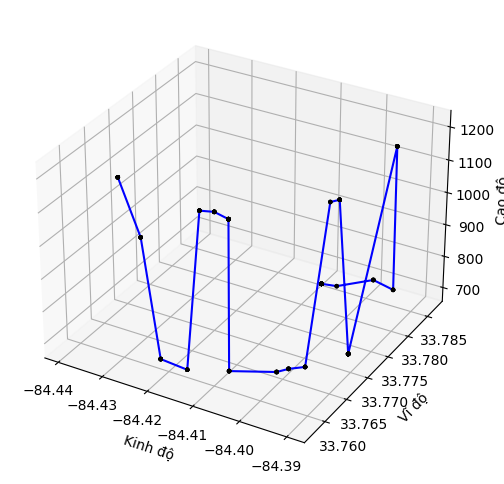

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Điều chỉnh kích thước của hình vẽ
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Lấy dữ liệu của máy bay cụ thể từ dataframe
specific_flight_data = flights_on_search_date

# Biểu diễn các điểm dữ liệu thành các chấm tròn đặc màu đen
ax.scatter(specific_flight_data['lon'], specific_flight_data['lat'], specific_flight_data['geoaltitude'], color='black', marker='o', label='Các điểm',s=5)

# Nối các điểm bằng các đoạn thẳng
ax.plot(specific_flight_data['lon'], specific_flight_data['lat'], specific_flight_data['geoaltitude'], color='blue')

# Đặt nhãn trục
ax.set_xlabel('Kinh độ')
ax.set_ylabel('Vĩ độ')
ax.set_zlabel('Cao độ')

# Hiển thị biểu đồ
plt.show()


#Mô phỏng kinh độ và vĩ độ

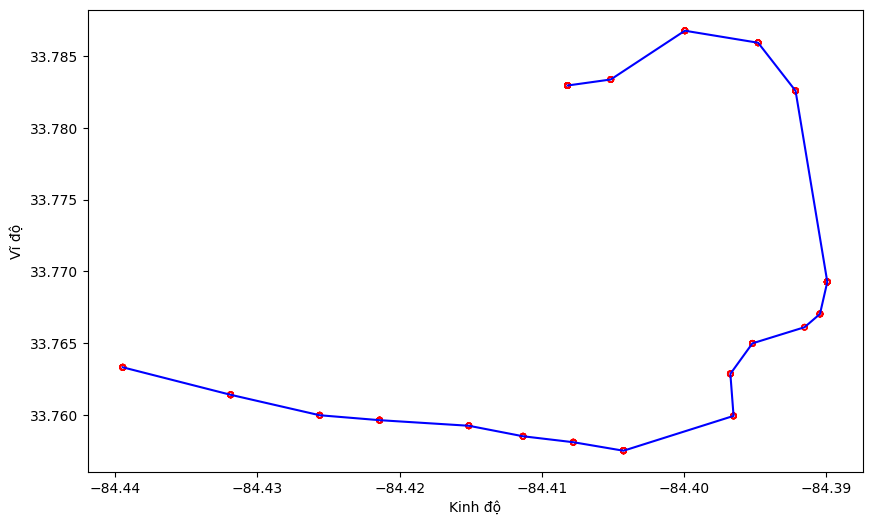

In [ ]:
import matplotlib.pyplot as plt

# Điều chỉnh kích thước của hình vẽ
plt.figure(figsize=(10, 6))

# Lấy dữ liệu của máy bay cụ thể từ dataframe
specific_flight_data = flights_on_search_date

# Vẽ đường nối giữa các điểm
plt.plot(specific_flight_data['lon'], specific_flight_data['lat'], linestyle='-', color='blue')

# Vẽ điểm của quỹ đạo máy bay cụ thể với màu đen
plt.scatter(specific_flight_data['lon'], specific_flight_data['lat'], label='Quỹ đạo máy bay', marker='o', facecolors='none', edgecolors='red',s=15)

# Đặt nhãn trục
plt.xlabel('Kinh độ')
plt.ylabel('Vĩ độ')

# Hiển thị biểu đồ
plt.show()


#Mô phỏng kinh độ theo thời gian

In [ ]:
import matplotlib.pyplot as plt

# Điều chỉnh kích thước của hình vẽ
plt.figure(figsize=(10, 6))

# Lấy dữ liệu của máy bay cụ thể từ dataframe
specific_flight_data = flights_on_search_date

# Vẽ các chấm tròn rỗng
plt.scatter(specific_flight_data.index, specific_flight_data['lon'], color='none', edgecolor='black',s=17)

# Vẽ đường nối các chấm
plt.plot(specific_flight_data.index, specific_flight_data['lon'], color='blue')

# Đặt nhãn trục
plt.xlabel('Thời gian')
plt.ylabel('Kinh độ')

# Hiển thị biểu đồ
plt.show()


#Mô phỏng vĩ độ theo thời gian

In [ ]:

import matplotlib.pyplot as plt

# Điều chỉnh kích thước của hình vẽ
plt.figure(figsize=(10, 6))

# Lấy dữ liệu của máy bay cụ thể từ dataframe
specific_flight_data = flights_on_search_date

# Vẽ các chấm tròn rỗng
plt.scatter(specific_flight_data.index, specific_flight_data['lat'], color='none', edgecolor='blue', s=20)

# Vẽ đường nối các chấm
plt.plot(specific_flight_data.index, specific_flight_data['lat'], color='black')

# Đặt nhãn trục
plt.xlabel('Thời gian')
plt.ylabel('Vĩ độ')

# Hiển thị biểu đồ
plt.show()


#Mô phỏng vận tốc theo thời gian

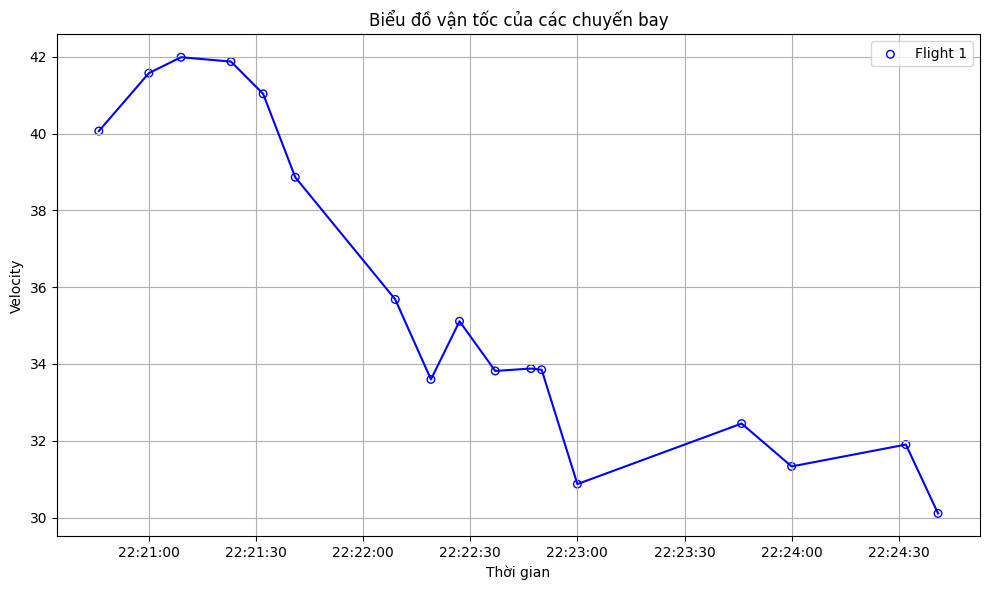

In [ ]:
import matplotlib.pyplot as plt

# Loại bỏ các dòng trùng lặp dựa trên cột 'velocity'
unique_values = flights_on_search_date.drop_duplicates(subset=['velocity'])

# Điều chỉnh kích thước của hình vẽ
plt.figure(figsize=(10, 6))

# Vẽ các chấm tròn rỗng
plt.scatter(unique_values.index, unique_values['velocity'], color='none', edgecolor='blue', s=30, label='Flight 1')

# Vẽ đường nối các chấm
plt.plot(unique_values.index, unique_values['velocity'], color='blue', label='_nolegend_')

# Đặt nhãn trục và tiêu đề
plt.xlabel('Thời gian')
plt.ylabel('Velocity')
plt.title('Biểu đồ vận tốc của các chuyến bay')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Điều chỉnh kích thước của hình vẽ
plt.figure(figsize=(10, 6))

# Chỉ định số lượng hình tròn bạn muốn hiển thị
num_points_to_show = 200

# Vẽ các hình tròn rỗng cho Flight 1
plt.scatter(flights_on_search_date.index[:num_points_to_show], flights_on_search_date['velocity'][:num_points_to_show], color='none', edgecolor='blue', s=30, label='Flight 1')

# Vẽ các hình tròn rỗng cho Flight 2
plt.scatter(flights_on_search_date2.index[:num_points_to_show], flights_on_search_date2['velocity'][:num_points_to_show], color='none', edgecolor='black', s=10, label='Flight 2')

# Vẽ đường nối các điểm cho Flight 1
plt.plot(flights_on_search_date.index[:num_points_to_show], flights_on_search_date['velocity'][:num_points_to_show], color='blue', label='_nolegend_')

# Vẽ đường nối các điểm cho Flight 2
plt.plot(flights_on_search_date2.index[:num_points_to_show], flights_on_search_date2['velocity'][:num_points_to_show], color='black', label='_nolegend_')

# Đặt nhãn trục và tiêu đề
plt.xlabel('Thời gian')
plt.ylabel('Velocity')
plt.title('Biểu đồ vận tốc của các chuyến bay')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.grid(True)
plt.tight_layout()
plt.show()


#Mô phỏng độ cao theo thời gian

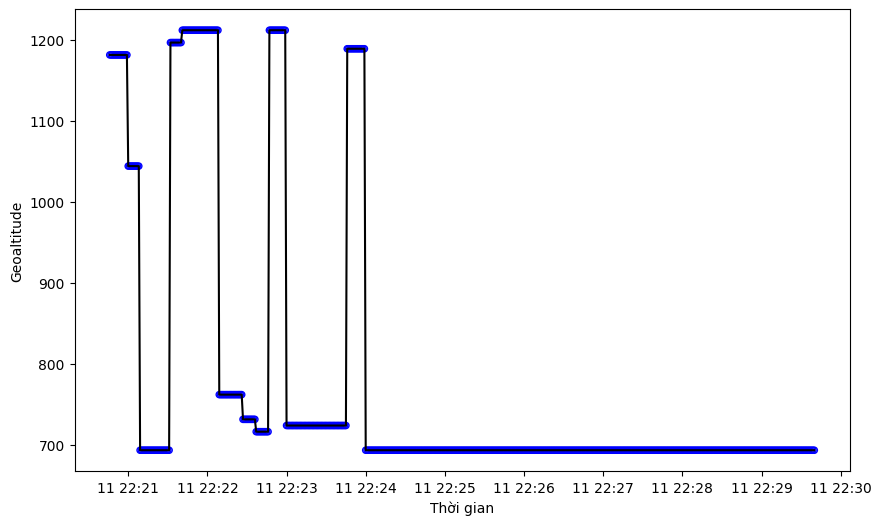

In [ ]:
import matplotlib.pyplot as plt

# Điều chỉnh kích thước của hình vẽ
plt.figure(figsize=(10, 6))

# Lấy dữ liệu của máy bay cụ thể từ dataframe
specific_flight_data = flights_on_search_date

# Vẽ các chấm tròn rỗng với kích thước nhỏ hơn
plt.scatter(specific_flight_data.index, specific_flight_data['geoaltitude'], color='none', edgecolor='blue', s=20)

# Vẽ đường nối các chấm
plt.plot(specific_flight_data.index, specific_flight_data['geoaltitude'], color='black')

# Đặt nhãn trục
plt.xlabel('Thời gian')
plt.ylabel('Geoaltitude')

# Hiển thị biểu đồ
plt.show()


#Mô phỏng heading theo thời gian

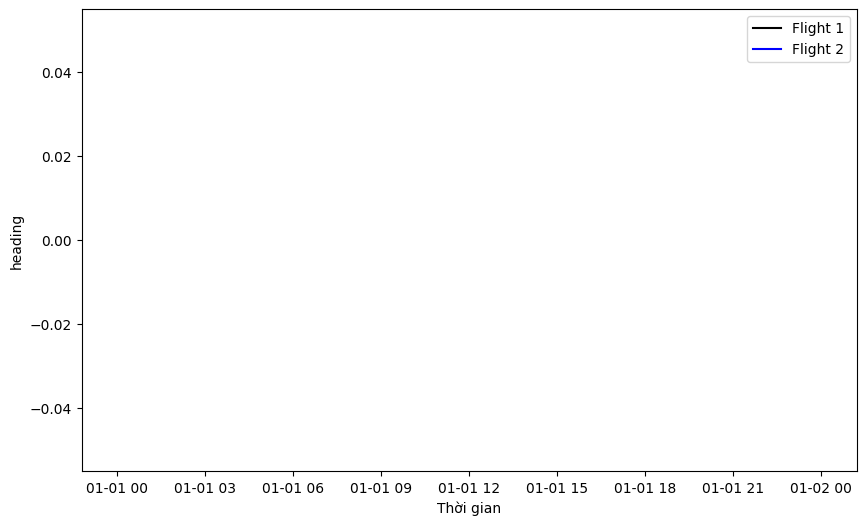

In [ ]:
import matplotlib.pyplot as plt

# Điều chỉnh kích thước của hình vẽ
plt.figure(figsize=(10, 6))

# Lấy dữ liệu của máy bay cụ thể từ dataframe
specific_flight_data2 = data2[(data2.index.date == search_date.date()) & (data2['icao24'] == 'a7912a')]
specific_flight_data = data[(data.index.date == search_date.date()) & (data['icao24'] == 'abe056')]

# Vẽ các chấm tròn rỗng
plt.scatter(specific_flight_data2.index, specific_flight_data2['heading'], color='none', edgecolor='black')
plt.scatter(specific_flight_data.index, specific_flight_data['heading'], color='none', edgecolor='blue')

# Vẽ đường nối các chấm
plt.plot(specific_flight_data2.index, specific_flight_data2['heading'], color='black', label='Flight 1')
plt.plot(specific_flight_data.index, specific_flight_data['heading'], color='blue', label='Flight 2')

# Đặt nhãn trục
plt.xlabel('Thời gian')
plt.ylabel('heading')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()


In [ ]:
!pip install traffic

In [ ]:
from traffic.core import Flight

In [ ]:
from traffic.data import airports
airports['ATL']

In [ ]:
from traffic.data import aircraft
aircraft["aba941"]

In [ ]:
data = data.rename(columns={'time': 'timestamp'})


In [ ]:
import folium

# Tạo một bản đồ với tọa độ trung tâm là vị trí của sân bay ATL
m = folium.Map(location=[33.6407, -84.4277], zoom_start=10)

# Đánh dấu vị trí của sân bay ATL trên bản đồ
folium.Marker([33.6407, -84.4277], tooltip='ATL Airport').add_to(m)

# Hiển thị bản đồ
m


In [ ]:
from traffic.core import Flight

# Tạo một đối tượng Flight từ DataFrame data
flight = Flight(data)

# Bây giờ bạn có thể sử dụng đối tượng flight để truy cập vào dữ liệu và thực hiện các phân tích


In [ ]:
start_time = pd.to_datetime("2017-03-30 00:03:32")
end_time = pd.to_datetime("2017-03-30 15:12:15")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Chuyển đổi thời gian thành datetime64
start_time = pd.to_datetime(start_time)
end_time = pd.to_datetime(end_time)

# Lọc dữ liệu trong khoảng thời gian cần vẽ
flight_subset = flight.between(start_time, end_time)

# Vẽ biểu đồ tốc độ của chuyến bay trong khoảng thời gian đã lọc
plt.plot(flight_subset.data.timestamp, flight_subset.data.velocity)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Flight Velocity')
plt.show()


In [ ]:
flight.between(start_time, end_time).data

NameError: name 'flight' is not defined

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Tạo biểu đồ 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

flight_subset = flight.between(start_time, end_time)

# Dữ liệu kinh độ, vĩ độ, độ cao và thời gian từ DataFrame đã lọc
longitude = flight_subset.data['lon']
latitude = flight_subset.data['lat']
altitude = flight_subset.data['geoaltitude']
timestamp = flight_subset.data['timestamp']

# Vẽ điểm dữ liệu trên biểu đồ 3D với màu sắc dựa trên thời gian
sc = ax.scatter(longitude, latitude, altitude, c=timestamp, cmap='viridis')

# Đặt nhãn cho các trục
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Altitude')
plt.colorbar(sc, label='Time')

# Hiển thị biểu đồ
plt.show()
